In [2]:
import pandas as pd
from pathlib import Path

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Define the path to the data file
data_path = Path("../data/processed/asomata_cleaned.xlsx")

# Load the data
df = pd.read_excel(data_path)

# Display the first few rows to verify the data loaded correctly
print(f"Loaded data with {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Loaded data with 3621 rows and 42 columns


,Date,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),Peak (MW),Hours of Operation Unit I,...,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),B,Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000),Year,Month,SourceFile
0,1,590,160,750,0.0,0.0,5,745,105,13.2,...,9840.4,2872.340426,243.940426,60,NaN,89.722222,7752.00,2014,1,2014_01_Asomata_english.xlsx
1,2,600,0,600,0.0,0.0,5,595,55,12.9,...,7784.0,1840.425532,56.425532,60,NaN,70.138889,6060.00,2014,1,2014_01_Asomata_english.xlsx
2,3,235,0,235,0.0,0.0,4,231,54,5.5,...,2628.0,0.000000,156.500000,30,NaN,29.103009,2514.50,2014,1,2014_01_Asomata_english.xlsx
3,4,355,0,355,0.0,0.0,5,350,54,7.0,...,3268.8,2356.382979,256.392979,60,NaN,42.000116,3628.81,2014,1,2014_01_Asomata_english.xlsx
4,5,195,0,195,0.0,0.0,5,190,40,5.0,...,2275.2,0.000000,81.300000,150,NaN,24.149306,2086.50,2014,1,2014_01_Asomata_english.xlsx


In [8]:
# Check the data types of each column
print("Data types for each column:")
df.dtypes

Data types for each column:


Date                                               int64
Production Unit I (MWh)                            int64
Production Unit II (MWh)                           int64
Total HPP                                          int64
Auxiliaries Consumptions Unit I (MWh)            float64
Auxiliaries Consumptions Unit II (MWh)           float64
Auxiliaries Consumptions Grid (MWh)                int64
Net Production (MWh)                               int64
Peak (MW)                                          int64
Hours of Operation Unit I                        float64
Hours of Operation Unit II                       float64
Unit I Maintenance Plant                         float64
Unit I Maintenance Outside                       float64
Unit I Failure Plant                             float64
Unit I Failure Outside                           float64
Unit II Maintenance Plant                        float64
Unit II Maintenance Outside                      float64
Unit II Failure Plant          

In [9]:
# Drop SourceFile, Date.1, and B columns
df = df.drop(columns=['SourceFile', 'Date.1', 'B', 'Comments'], errors='ignore')

# Get all column names
all_cols = df.columns.tolist()

# Remove Year and Month if they exist (so we don't duplicate them)
cols_without_year_month = [col for col in all_cols if col not in ['Year', 'Month']]

# Create new column order with Year and Month first, then all other columns
new_col_order = ['Year', 'Month'] + cols_without_year_month

# Reindex the dataframe with the new column order
df = df[new_col_order]

# Display the result
print("DataFrame with reorganized columns:")
df.head()

DataFrame with reorganized columns:


,Year,Month,Date,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),...,Catchment water inflow,Production Water Consumption (m3 x 1000),Specific Consumption,Turbine Efficiency,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000)
0,2014,1,1,590,160,750,0.0,0.0,5,745,...,10024.340426,7752.00,10.336,83.440807,9840.4,2872.340426,243.940426,60,89.722222,7752.00
1,2014,1,2,600,0,600,0.0,0.0,5,595,...,7780.425532,6060.00,10.100,85.490973,7784.0,1840.425532,56.425532,60,70.138889,6060.00
2,2014,1,3,235,0,235,0.0,0.0,4,231,...,2754.500000,2514.50,10.700,80.507657,2628.0,0.000000,156.500000,30,29.103009,2514.50
3,2014,1,4,355,0,355,0.0,0.0,5,350,...,3465.192979,3628.81,10.222,86.401972,3268.8,2356.382979,256.392979,60,42.000116,3628.81
4,2014,1,5,195,0,195,0.0,0.0,5,190,...,2206.500000,2086.50,10.700,82.442937,2275.2,0.000000,81.300000,150,24.149306,2086.50


In [10]:
df.columns

Index(['Year', 'Month', 'Date', 'Production Unit I (MWh)',
       'Production Unit II (MWh)', 'Total HPP',
       'Auxiliaries Consumptions Unit I (MWh)',
       'Auxiliaries Consumptions Unit II (MWh)',
       'Auxiliaries Consumptions Grid (MWh)', 'Net Production (MWh)',
       'Peak (MW)', 'Hours of Operation Unit I', 'Hours of Operation Unit II',
       'Unit I Maintenance Plant', 'Unit I Maintenance Outside',
       'Unit I Failure Plant', 'Unit I Failure Outside',
       'Unit II Maintenance Plant', 'Unit II Maintenance Outside',
       'Unit II Failure Plant', 'Unit II Failure Outside',
       'Number of Starts Unit I', 'Number of Starts Unit II',
       'Asomata Reservoir Water Level (m)',
       'Asomata Reservoir Water Content (m3 x 1000)',
       'Regulating lake Water Level (m)',
       'Regulating lake Water Content (m3 x 1000)', 'Water saved in lake',
       'Catchment water inflow', 'Production Water Consumption (m3 x 1000)',
       'Specific Consumption', 'Turbine Effic

In [11]:
# Create a proper datetime column from Year, Month, and the existing Date column (which has day numbers)
# First, check what's in the Date column
print("First few values in the Date column (contains day numbers):")
print(df['Date'].head())

# Create a proper datetime from Year, Month, and the day numbers in the Date column
# Rename the old Date column temporarily to avoid confusion
df = df.rename(columns={'Date': 'Day'})

# Now create the proper datetime
df['Date'] = pd.to_datetime({
    'year': df['Year'], 
    'month': df['Month'], 
    'day': df['Day']
})

# Get the min and max dates in the dataset
min_date = df['Date'].min()
max_date = df['Date'].max()

# Create a complete date range at monthly frequency
complete_date_range = pd.date_range(start=min_date, end=max_date, freq='MS')  # MS = Month Start

# Convert to DataFrame for comparison
date_df = pd.DataFrame({'Date': complete_date_range})

# Check which dates from the complete range are missing in the dataset
missing_dates = date_df[~date_df['Date'].isin(df['Date'])]

if missing_dates.empty:
    print("No missing months in the dataset.")
else:
    print(f"Found {len(missing_dates)} missing months in the dataset:")
    print(missing_dates.sort_values('Date'))

# Count records per month to check for potentially incomplete months
print("\nRecords per month:")
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='count')
print(monthly_counts.sort_values(['Year', 'Month']))

First few values in the Date column (contains day numbers):
0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64
Found 1 missing months in the dataset:
          Date
112 2023-05-01

Records per month:
     Year  Month  count
0    2014      1     31
1    2014      2     28
2    2014      3     31
3    2014      4     30
4    2014      5     31
..    ...    ...    ...
114  2023      8     31
115  2023      9     30
116  2023     10     31
117  2023     11     30
118  2023     12     31

[119 rows x 3 columns]


In [12]:
df

,Year,Month,Day,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),...,Production Water Consumption (m3 x 1000),Specific Consumption,Turbine Efficiency,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000),Date
0,2014,1,1,590,160,750,0.0,0.0,5,745,...,7752.00,10.336,83.440807,9840.40,2872.340426,243.940426,60,89.722222,7752.00,2014-01-01
1,2014,1,2,600,0,600,0.0,0.0,5,595,...,6060.00,10.100,85.490973,7784.00,1840.425532,56.425532,60,70.138889,6060.00,2014-01-02
2,2014,1,3,235,0,235,0.0,0.0,4,231,...,2514.50,10.700,80.507657,2628.00,0.000000,156.500000,30,29.103009,2514.50,2014-01-03
3,2014,1,4,355,0,355,0.0,0.0,5,350,...,3628.81,10.222,86.401972,3268.80,2356.382979,256.392979,60,42.000116,3628.81,2014-01-04
4,2014,1,5,195,0,195,0.0,0.0,5,190,...,2086.50,10.700,82.442937,2275.20,0.000000,81.300000,150,24.149306,2086.50,2014-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,2023,12,27,244,0,244,0.0,0.0,3,244,...,2440.00,10.000,85.740654,5141.55,2696.808511,115.258511,0,28.240741,2440.00,2023-12-27
3617,2023,12,28,187,267,454,0.0,0.0,4,454,...,4585.40,10.100,84.693854,8150.30,3372.340426,87.440426,40,53.071759,4585.40,2023-12-28
3618,2023,12,29,257,0,257,0.0,0.0,3,257,...,2595.70,10.100,83.814679,9118.80,5489.361702,106.261702,60,30.042824,2595.70,2023-12-29
3619,2023,12,30,0,329,329,0.0,0.0,3,329,...,3322.90,10.100,83.718118,4215.15,841.836735,69.586735,0,38.459491,3322.90,2023-12-30


In [13]:
# Drop the Year, Month, and Day columns since we already have the Date column
df = df.drop(columns=['Year', 'Month', 'Day'])

# Move Date to the first column position
cols = df.columns.tolist()
cols.remove('Date')
df = df[['Date'] + cols]

In [14]:
# Load the weather data
weather_path = Path("../data/processed/weather_data.csv")

weather_df = pd.read_csv(weather_path)

# Convert date column to datetime and explicitly format as YYYY-MM-DD
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['date'] = weather_df['date'].dt.strftime('%Y-%m-%d')
weather_df['date'] = pd.to_datetime(weather_df['date'])  # Convert back to datetime

# Display the first few rows and info about the weather data
print(f"Loaded weather data with {weather_df.shape[0]} rows and {weather_df.shape[1]} columns")
weather_df.head()

Loaded weather data with 3652 rows and 4 columns


,date,temperature_2m_mean,precipitation_sum,rain_sum
0,2013-12-31,6.482250,0.1,0.1
1,2014-01-01,6.959334,0.1,0.1
2,2014-01-02,5.094750,0.0,0.0
3,2014-01-03,4.867666,0.0,0.0
4,2014-01-04,5.067666,0.6,0.6


In [15]:
# Merge df with weather_df on date columns
# First, rename the weather_df date column to match df
weather_df = weather_df.rename(columns={'date': 'Date'})

# Then do a left join to keep only dates that exist in df
merged_df = pd.merge(df, weather_df, on='Date', how='left')

# Display the merged dataframe
print(f"Merged dataframe has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns")
merged_df.head()

Merged dataframe has 3621 rows and 39 columns


,Date,Production Unit I (MWh),Production Unit II (MWh),Total HPP,Auxiliaries Consumptions Unit I (MWh),Auxiliaries Consumptions Unit II (MWh),Auxiliaries Consumptions Grid (MWh),Net Production (MWh),Peak (MW),Hours of Operation Unit I,...,Turbine Efficiency,HPP Sfikia Water Production (m3 x 1000),HPP Sfikia Water Pumped upstream (m3 x 1000),Lake natural inflow (m3 x 1000),Losses (m3 x 1000),Regulating lake Water flow (m3/s),Regulating lake Total Water (m3 x 1000),temperature_2m_mean,precipitation_sum,rain_sum
0,2014-01-01,590,160,750,0.0,0.0,5,745,105,13.2,...,83.440807,9840.4,2872.340426,243.940426,60,89.722222,7752.00,6.959334,0.1,0.1
1,2014-01-02,600,0,600,0.0,0.0,5,595,55,12.9,...,85.490973,7784.0,1840.425532,56.425532,60,70.138889,6060.00,5.094750,0.0,0.0
2,2014-01-03,235,0,235,0.0,0.0,4,231,54,5.5,...,80.507657,2628.0,0.000000,156.500000,30,29.103009,2514.50,4.867666,0.0,0.0
3,2014-01-04,355,0,355,0.0,0.0,5,350,54,7.0,...,86.401972,3268.8,2356.382979,256.392979,60,42.000116,3628.81,5.067666,0.6,0.6
4,2014-01-05,195,0,195,0.0,0.0,5,190,40,5.0,...,82.442937,2275.2,0.000000,81.300000,150,24.149306,2086.50,8.101000,1.8,1.8


In [16]:
# Find columns with missing values and show count and percentage
print("Columns with missing values:")
nan_columns = merged_df.columns[merged_df.isna().any()]
nan_info = pd.DataFrame({
    'Missing Count': merged_df[nan_columns].isna().sum(),
    'Missing Percentage': 100 * merged_df[nan_columns].isna().sum() / len(merged_df)
})

# Sort by missing count in descending order
nan_info = nan_info.sort_values('Missing Count', ascending=False)

# Display only the columns with NaN values
print(nan_info)

Columns with missing values:
                     Missing Count  Missing Percentage
Turbine Efficiency               8            0.220933
temperature_2m_mean              1            0.027617
precipitation_sum                1            0.027617
rain_sum                         1            0.027617


Imputation

In [17]:
# Method 1: Forward fill (use previous day's values)
# First identify the weather columns
weather_columns = ['temperature_2m_mean', 'precipitation_sum', 'rain_sum']

# Apply forward fill to weather columns
merged_df[weather_columns] = merged_df[weather_columns].fillna(method='ffill')
merged_df['Turbine Efficiency'] = merged_df['Turbine Efficiency'].fillna(method='ffill')

C:\Users\Αφροδίτη Φραγκιαδάκη\AppData\Local\Temp\ipykernel_15180\724884832.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[weather_columns] = merged_df[weather_columns].fillna(method='ffill')
C:\Users\Αφροδίτη Φραγκιαδάκη\AppData\Local\Temp\ipykernel_15180\724884832.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Turbine Efficiency'] = merged_df['Turbine Efficiency'].fillna(method='ffill')


PROPHET MODEL

Importing plotly failed. Interactive plots will not work.


Using existing 'merged_df' for Prophet analysis.

Training data range: 2014-01-01 to 2023-12-01
Validation data range: 2023-12-02 to 2023-12-31
Number of training samples: 3591
Number of validation samples: 30

--- Running Prophet Model (Weather Features Only) ---
Fitting Prophet model...


12:08:32 - cmdstanpy - INFO - Chain [1] start processing
12:08:33 - cmdstanpy - INFO - Chain [1] done processing


Prophet model fitted.

--- Prophet (Weather Only) Performance Statistics (Validation Set) ---
MAE: 76.7122 MWh
RMSE: 114.5544 MWh
MAPE: 22.15%
SMAPE: 24.05%
R2 Score: 0.0352

--- Calculating Baseline Models ---

--- Naive (Persistence) Performance Statistics (Validation Set) ---
MAE: 105.6000 MWh
RMSE: 150.3782 MWh
MAPE: 28.73%
SMAPE: 34.88%
R2 Score: -0.6626

--- Seasonal Naive (Weekly) Performance Statistics (Validation Set) ---
MAE: 118.2667 MWh
RMSE: 153.0651 MWh
MAPE: 39.06%
SMAPE: 37.75%
R2 Score: -0.7226

--- Overall Model Performance Summary (R2 Scores) ---
Prophet (Weather Only) R2: 0.0352
Naive (Persistence) R2: -0.6626
Seasonal Naive (Weekly) R2: -0.7226

--- Generating Plots ---


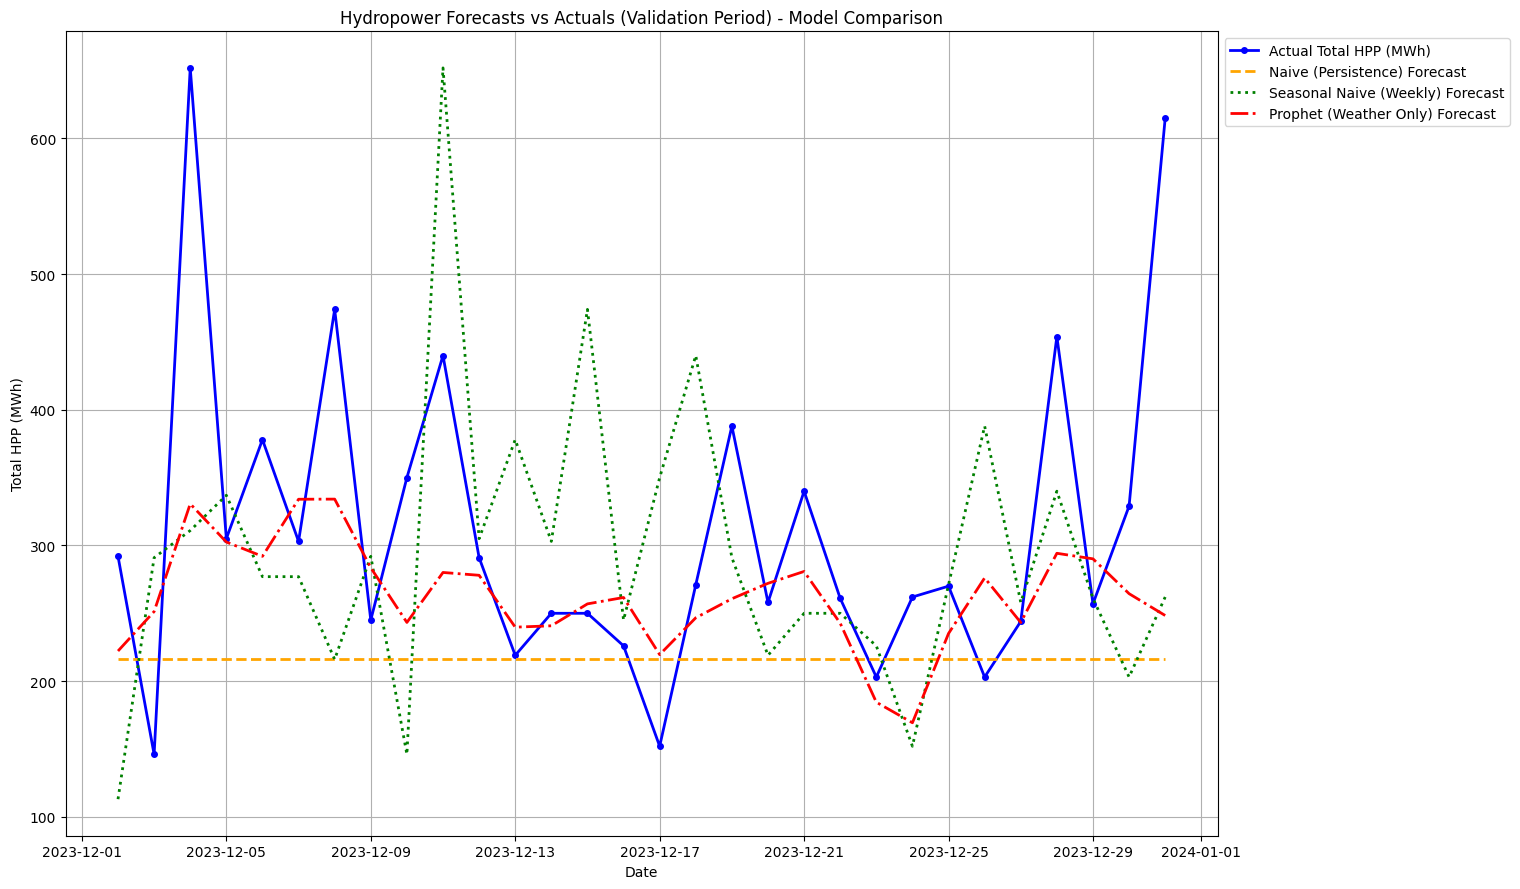


--- Generating Time Series Decomposition Plot ---
Multiplicative decomposition failed, trying additive model for decomposition.


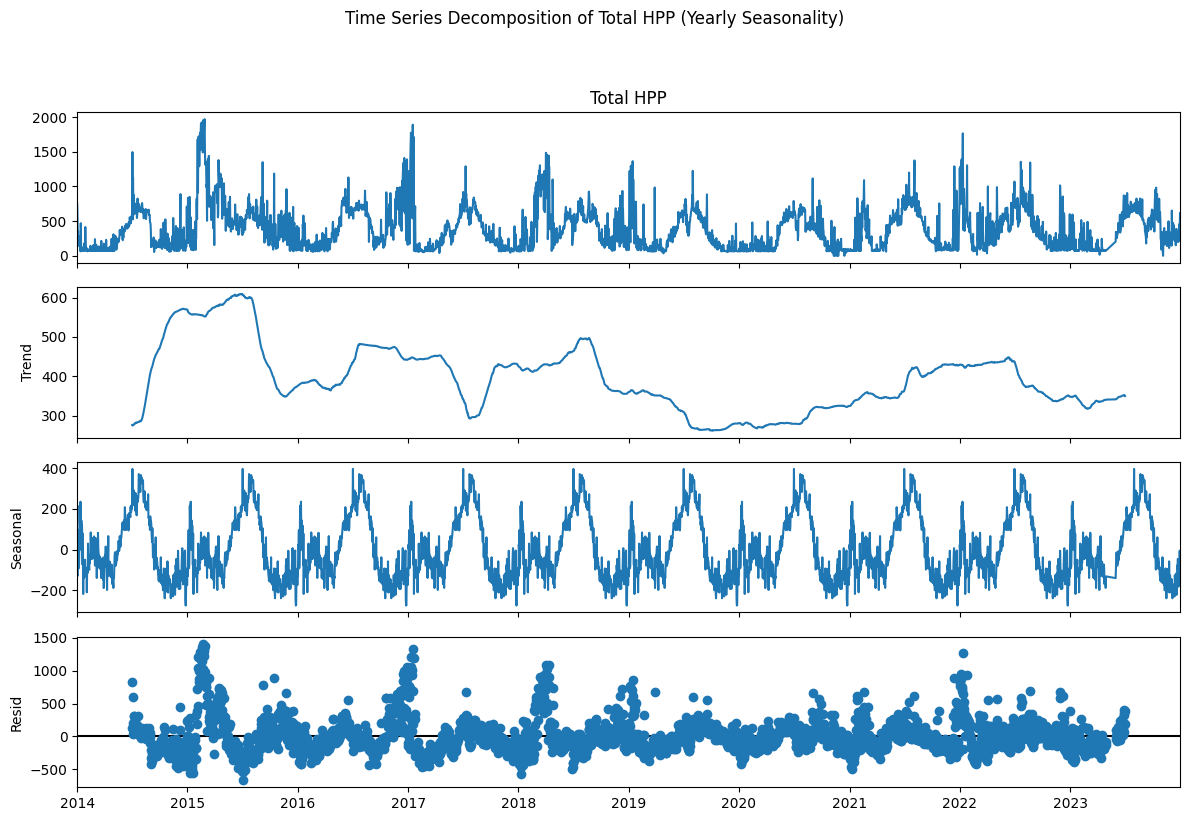


--- Generating Actual vs. Predicted Scatter Plot for Prophet ---


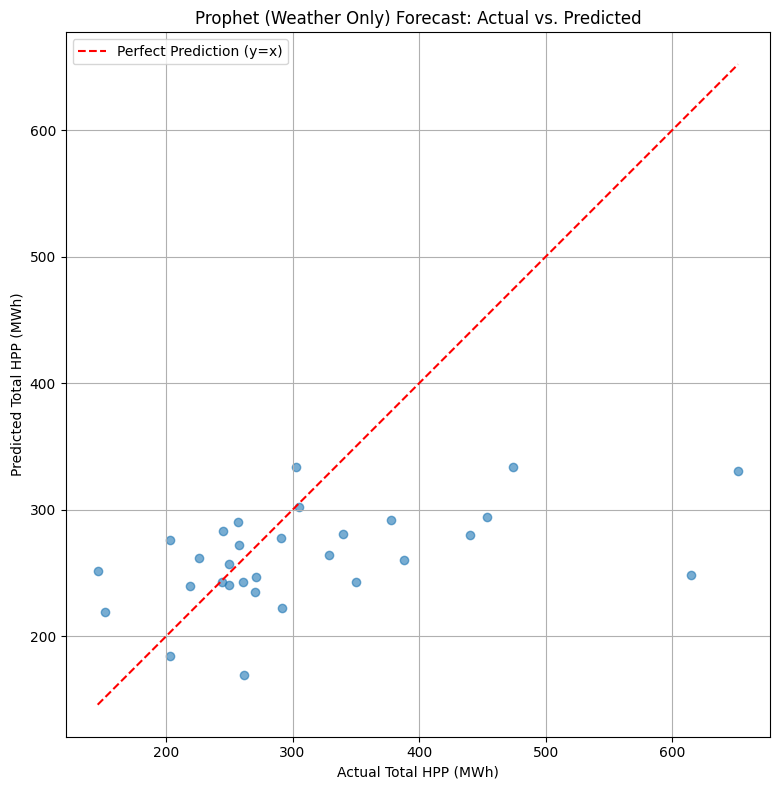


--- Generating Forecast Error Distribution Plots for Prophet ---


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [18]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot # For Q-Q plot

# --- Configuration ---
# Assuming 'merged_df' is already loaded and preprocessed in your environment.
# It should contain: 'Date', 'Total HPP', 'temperature_2m_mean', 'precipitation_sum', 'rain_sum', and 'time_idx'.
target_column = "Total HPP"
validation_days = 30 # Number of days to use for the validation set at the end of the data


# --- Utility Functions for Metrics ---
def calculate_mape(y_true, y_pred):
    """Calculates Mean Absolute Percentage Error (MAPE)."""
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

def calculate_smape(y_true, y_pred):
    """Calculates Symmetric Mean Absolute Percentage Error (SMAPE)."""
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_pred - y_true) / np.maximum(denominator, 1e-8)) * 100

def print_metrics(model_name, y_true, y_pred):
    """Helper function to print common regression metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = calculate_mape(y_true, y_pred)
    smape = calculate_smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {model_name} Performance Statistics (Validation Set) ---")
    print(f"MAE: {mae:.4f} MWh")
    print(f"RMSE: {rmse:.4f} MWh")
    print(f"MAPE: {mape:.2f}%")
    print(f"SMAPE: {smape:.2f}%")
    print(f"R2 Score: {r2:.4f}")
    return {"MAE": mae, "RMSE": rmse, "MAPE": mape, "SMAPE": smape, "R2": r2}


# --- 1. Initial Data Preparation (using existing merged_df) ---
print("Using existing 'merged_df' for Prophet analysis.")
# Ensure 'Total HPP' is float (redundant if already done, but safe)
merged_df[target_column] = merged_df[target_column].astype(float)
# Ensure 'Date' is datetime (redundant if already done, but safe)
merged_df["Date"] = pd.to_datetime(merged_df["Date"])
# Ensure data is sorted by date and time_idx is sequential for splitting
merged_df = merged_df.sort_values(by="Date").reset_index(drop=True)
if "time_idx" not in merged_df.columns:
    merged_df["time_idx"] = np.arange(len(merged_df))


# --- 2. Data Splitting ---
training_cutoff_idx = merged_df["time_idx"].max() - validation_days
training_cutoff_date = merged_df.loc[merged_df["time_idx"] == training_cutoff_idx, "Date"].iloc[0]

train_df = merged_df[merged_df["Date"] <= training_cutoff_date].copy()
val_df = merged_df[merged_df["Date"] > training_cutoff_date].copy()

validation_start_date = val_df["Date"].min()
validation_end_date = val_df["Date"].max()

print(f"\nTraining data range: {train_df['Date'].min().strftime('%Y-%m-%d')} to {train_df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Validation data range: {validation_start_date.strftime('%Y-%m-%d')} to {validation_end_date.strftime('%Y-%m-%d')}")
print(f"Number of training samples: {len(train_df)}")
print(f"Number of validation samples: {len(val_df)}")


# --- 3. Prophet Model Setup and Training (Weather Features Only) ---
print("\n--- Running Prophet Model (Weather Features Only) ---")
prophet_df = merged_df[["Date", target_column,
                        "temperature_2m_mean", "precipitation_sum", "rain_sum"]].copy()
prophet_df = prophet_df.rename(columns={"Date": "ds", target_column: "y"})

train_prophet_df = prophet_df[prophet_df["ds"] <= training_cutoff_date]
val_prophet_df = prophet_df[prophet_df["ds"] > training_cutoff_date]

m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    growth='linear'
)

regressors = ["temperature_2m_mean", "precipitation_sum", "rain_sum"]
for regressor in regressors:
    m.add_regressor(regressor)

print("Fitting Prophet model...")
m.fit(train_prophet_df)
print("Prophet model fitted.")

# Make predictions for the validation period
future_df = val_prophet_df[['ds'] + regressors].copy() # Must include regressors for future
forecast = m.predict(future_df)

prophet_y_pred = forecast['yhat'].values
prophet_y_true = val_prophet_df['y'].values # Actuals for Prophet's validation set

prophet_metrics = print_metrics("Prophet (Weather Only)", prophet_y_true, prophet_y_pred)


# --- 4. Baseline Models Calculation ---
print("\n--- Calculating Baseline Models ---")

# Naive (Persistence) Forecast
last_training_value = train_df[target_column].iloc[-1] # Last value of training set
naive_predictions = np.full_like(prophet_y_true, last_training_value)
naive_metrics = print_metrics("Naive (Persistence)", prophet_y_true, naive_predictions)


# Seasonal Naive (Weekly) Forecast
seasonal_naive_predictions = np.zeros_like(prophet_y_true, dtype=float)
# Get actuals from the week prior to the validation period (from merged_df, spanning into training data)
start_date_prev_week = validation_start_date - pd.Timedelta(days=7)
end_date_prev_week = validation_end_date - pd.Timedelta(days=7)

previous_week_actuals_df = merged_df[(merged_df["Date"] >= start_date_prev_week) &
                                    (merged_df["Date"] <= end_date_prev_week)
                                    ].copy()

if len(previous_week_actuals_df) >= len(prophet_y_true):
    seasonal_naive_predictions = previous_week_actuals_df[target_column].values[:len(prophet_y_true)]
else:
    # Fallback for short history (pad with naive forecast)
    padding_needed = len(prophet_y_true) - len(previous_week_actuals_df)
    seasonal_naive_predictions = np.concatenate([
        previous_week_actuals_df[target_column].values,
        np.full(padding_needed, last_training_value)
    ])
seasonal_naive_metrics = print_metrics("Seasonal Naive (Weekly)", prophet_y_true, seasonal_naive_predictions)


# --- 5. Overall Model Performance Summary ---
print("\n--- Overall Model Performance Summary (R2 Scores) ---")
print(f"Prophet (Weather Only) R2: {prophet_metrics['R2']:.4f}")
print(f"Naive (Persistence) R2: {naive_metrics['R2']:.4f}")
print(f"Seasonal Naive (Weekly) R2: {seasonal_naive_metrics['R2']:.4f}")


# --- 6. Plotting ---
print("\n--- Generating Plots ---")

# Get the dates for the validation period (x-axis for plots)
val_dates_for_plot = val_prophet_df['ds'].values

# Combined Plot: Actuals vs. All Forecasts
plt.figure(figsize=(18, 9))
plt.plot(val_dates_for_plot, prophet_y_true, label='Actual Total HPP (MWh)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(val_dates_for_plot, naive_predictions, label='Naive (Persistence) Forecast', color='orange', linestyle='--', linewidth=2)
plt.plot(val_dates_for_plot, seasonal_naive_predictions, label='Seasonal Naive (Weekly) Forecast', color='green', linestyle=':', linewidth=2)
plt.plot(val_dates_for_plot, prophet_y_pred, label='Prophet (Weather Only) Forecast', color='red', linestyle='-.', linewidth=2)

plt.title('Hydropower Forecasts vs Actuals (Validation Period) - Model Comparison')
plt.xlabel('Date')
plt.ylabel('Total HPP (MWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


# Time Series Decomposition Plot (using the full merged_df)
print("\n--- Generating Time Series Decomposition Plot ---")
indexed_df = merged_df.set_index("Date").copy()
indexed_df.index = pd.to_datetime(indexed_df.index)

try:
    decomposition = seasonal_decompose(indexed_df[target_column], model='multiplicative', period=365) # Yearly seasonality
except ValueError:
    print("Multiplicative decomposition failed, trying additive model for decomposition.")
    decomposition = seasonal_decompose(indexed_df[target_column], model='additive', period=365)

fig_decomp = decomposition.plot()
fig_decomp.set_size_inches(12, 8)
fig_decomp.suptitle('Time Series Decomposition of Total HPP (Yearly Seasonality)', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


# Actual vs. Predicted (Scatter Plot for Prophet)
print("\n--- Generating Actual vs. Predicted Scatter Plot for Prophet ---")
plt.figure(figsize=(8, 8))
plt.scatter(prophet_y_true, prophet_y_pred, alpha=0.6)
plt.plot([min(prophet_y_true), max(prophet_y_true)], [min(prophet_y_true), max(prophet_y_true)],
         color='red', linestyle='--', label='Perfect Prediction (y=x)')

plt.title('Prophet (Weather Only) Forecast: Actual vs. Predicted')
plt.xlabel('Actual Total HPP (MWh)')
plt.ylabel('Predicted Total HPP (MWh)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


# Forecast Error Distribution (Histogram and Q-Q Plot for Prophet)
print("\n--- Generating Forecast Error Distribution Plots for Prophet ---")
forecast_errors = prophet_y_true - prophet_y_pred

plt.figure(figsize=(14, 6))

Using existing 'merged_df' for Prophet analysis.
First 5 rows of merged_df (after ensuring types/sort and adding calendar features):
        Date  Production Unit I (MWh)  Production Unit II (MWh)  Total HPP  \
0 2014-01-01                      590                       160      750.0   
1 2014-01-02                      600                         0      600.0   
2 2014-01-03                      235                         0      235.0   
3 2014-01-04                      355                         0      355.0   
4 2014-01-05                      195                         0      195.0   

   Auxiliaries Consumptions Unit I (MWh)  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Auxiliaries Consumptions Unit II (MWh)  \
0                                     0.0   
1                                     0.0  

12:08:56 - cmdstanpy - INFO - Chain [1] start processing
12:08:57 - cmdstanpy - INFO - Chain [1] done processing


Prophet model fitted.

--- Prophet (Weather + Calendar Features) Performance Statistics (Validation Set) ---
MAE: 80.1474 MWh
RMSE: 120.4963 MWh
MAPE: 23.19%
SMAPE: 25.53%
R2 Score: -0.0675

--- Calculating Baseline Models (for comparison) ---

--- Naive (Persistence) Performance Statistics (Validation Set) ---
MAE: 105.6000 MWh
RMSE: 150.3782 MWh
MAPE: 28.73%
SMAPE: 34.88%
R2 Score: -0.6626

--- Seasonal Naive (Weekly) Performance Statistics (Validation Set) ---
MAE: 118.2667 MWh
RMSE: 153.0651 MWh
MAPE: 39.06%
SMAPE: 37.75%
R2 Score: -0.7226

--- Overall Model Performance Summary (R2 Scores) ---
Prophet (Weather + Calendar Features) R2: -0.0675
Naive (Persistence) R2: -0.6626
Seasonal Naive (Weekly) R2: -0.7226

--- Generating Plots ---


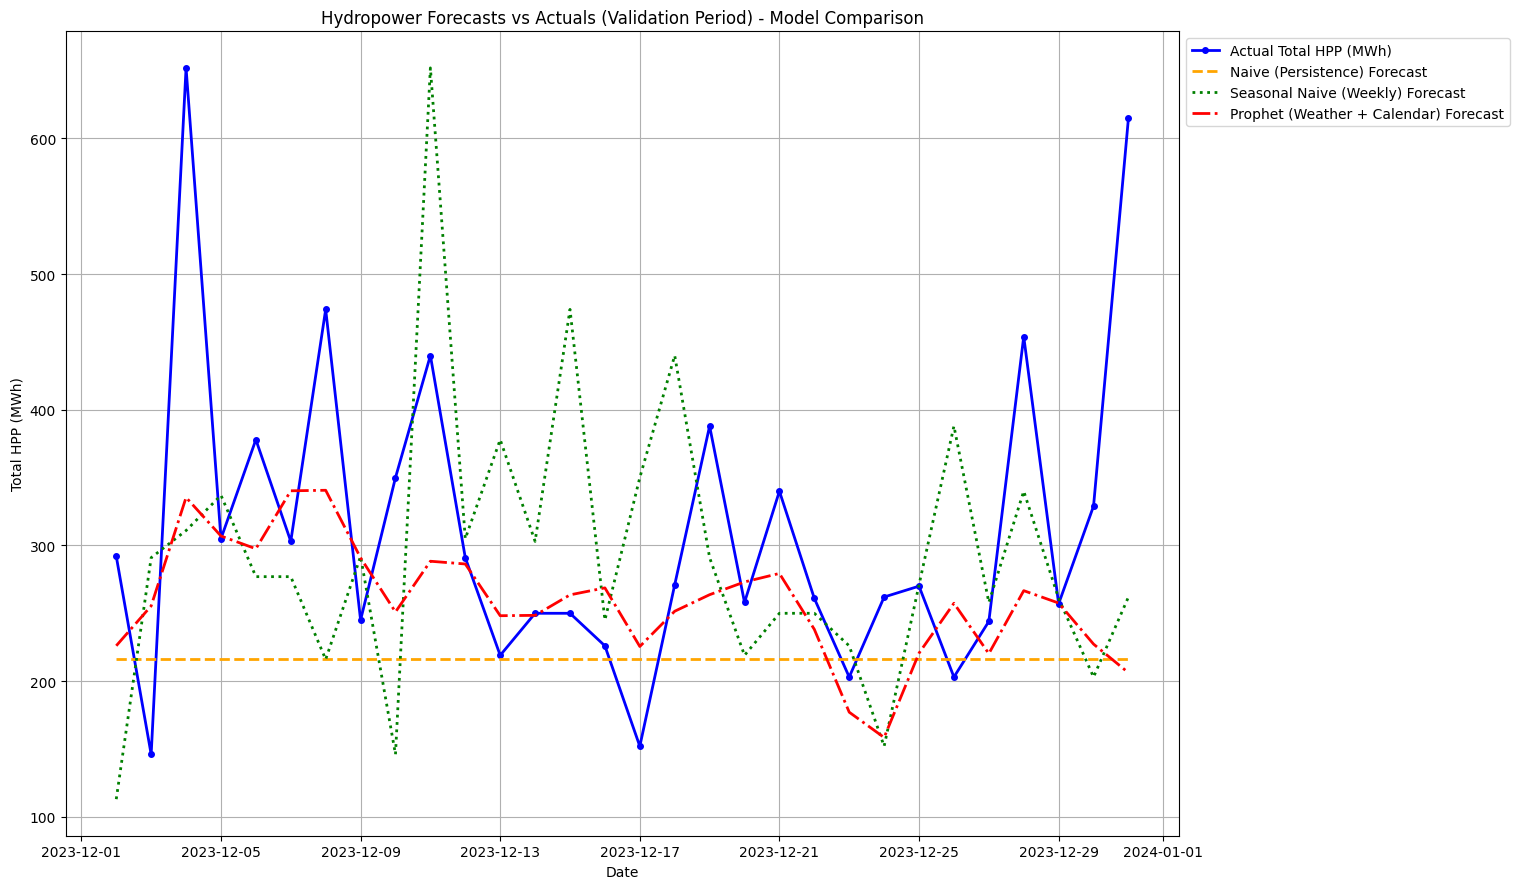


--- Generating Time Series Decomposition Plot ---
Multiplicative decomposition failed, trying additive model for decomposition.


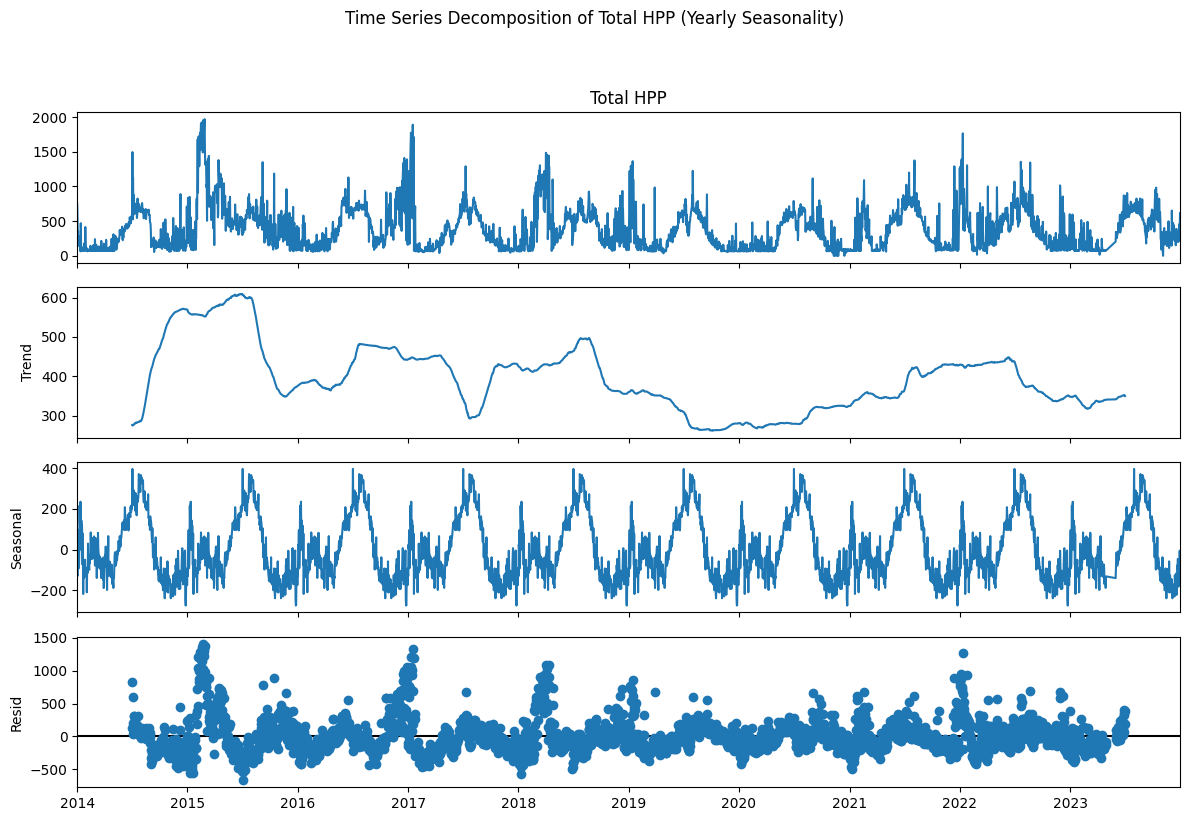


--- Generating Actual vs. Predicted Scatter Plot for Prophet ---


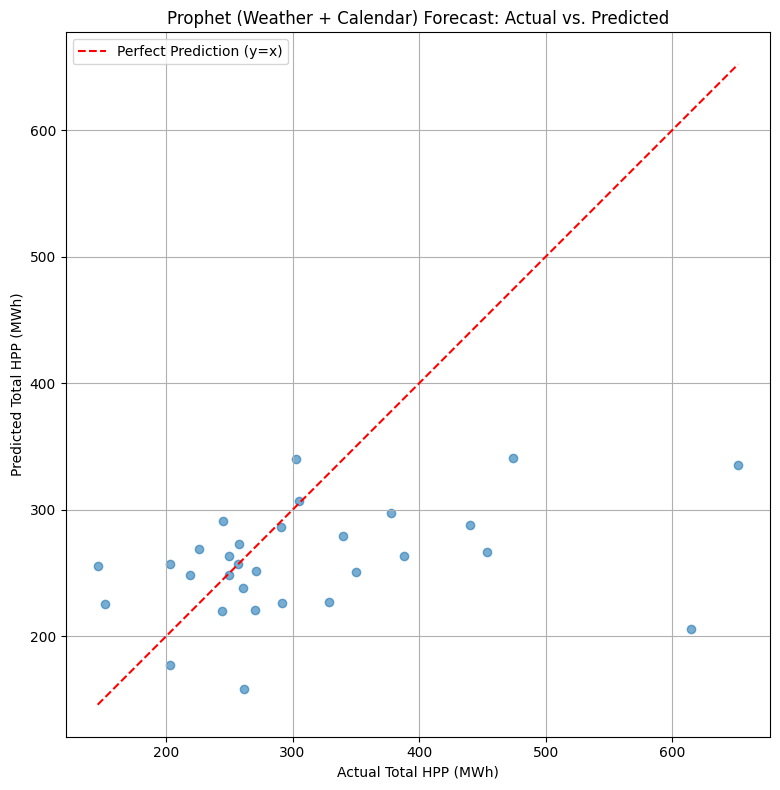


--- Generating Forecast Error Distribution Plots for Prophet ---


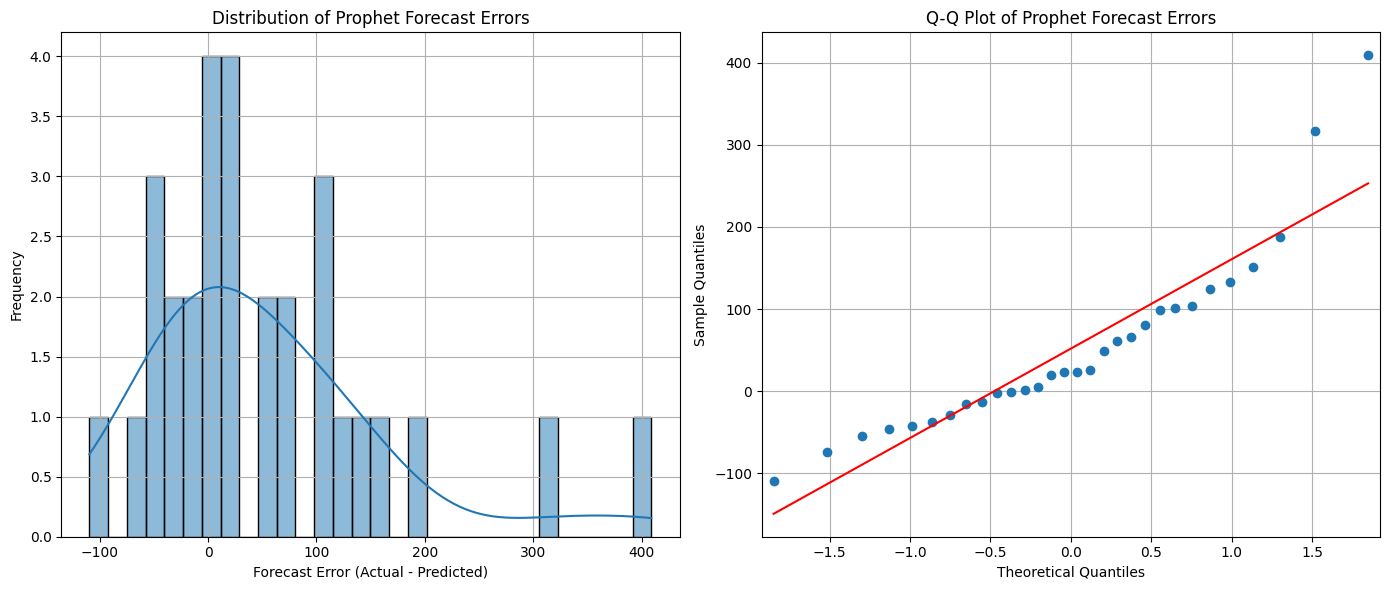


--- All plots generated. ---


In [19]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot # For Q-Q plot

# --- Configuration ---
# Assuming 'merged_df' is already loaded and preprocessed in your environment.
# It should contain: 'Date', 'Total HPP', 'temperature_2m_mean', 'precipitation_sum', 'rain_sum', and 'time_idx'.
target_column = "Total HPP"
validation_days = 30 # Number of days to use for the validation set at the end of the data


# --- Utility Functions for Metrics ---
def calculate_mape(y_true, y_pred):
    """Calculates Mean Absolute Percentage Error (MAPE)."""
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

def calculate_smape(y_true, y_pred):
    """Calculates Symmetric Mean Absolute Percentage Error (SMAPE)."""
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_pred - y_true) / np.maximum(denominator, 1e-8)) * 100

def print_metrics(model_name, y_true, y_pred):
    """Helper function to print common regression metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = calculate_mape(y_true, y_pred)
    smape = calculate_smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {model_name} Performance Statistics (Validation Set) ---")
    print(f"MAE: {mae:.4f} MWh")
    print(f"RMSE: {rmse:.4f} MWh")
    print(f"MAPE: {mape:.2f}%")
    print(f"SMAPE: {smape:.2f}%")
    print(f"R2 Score: {r2:.4f}")
    return {"MAE": mae, "RMSE": rmse, "MAPE": mape, "SMAPE": smape, "R2": r2}


# --- 1. Initial Data Preparation (using existing merged_df) ---
print("Using existing 'merged_df' for Prophet analysis.")
# Ensure 'Total HPP' is float (redundant if already done, but safe)
merged_df[target_column] = merged_df[target_column].astype(float)
# Ensure 'Date' is datetime (redundant if already done, but safe)
merged_df["Date"] = pd.to_datetime(merged_df["Date"])
# Ensure data is sorted by date and time_idx is sequential for splitting
merged_df = merged_df.sort_values(by="Date").reset_index(drop=True)
if "time_idx" not in merged_df.columns:
    merged_df["time_idx"] = np.arange(len(merged_df))

# --- ADDING CALENDAR FEATURES ---
merged_df["day_of_week"] = merged_df["Date"].dt.dayofweek.astype(str) # 0=Monday, 6=Sunday - Categorical
merged_df["day_of_year"] = merged_df["Date"].dt.dayofyear # Numerical
merged_df["month"] = merged_df["Date"].dt.month.astype(str) # Categorical
merged_df["week_of_year"] = merged_df["Date"].dt.isocalendar().week.astype(str) # Categorical

print("First 5 rows of merged_df (after ensuring types/sort and adding calendar features):")
print(merged_df.head())
print(f"Total data points in merged_df: {len(merged_df)}")


# --- 2. Data Splitting ---
training_cutoff_idx = merged_df["time_idx"].max() - validation_days
training_cutoff_date = merged_df.loc[merged_df["time_idx"] == training_cutoff_idx, "Date"].iloc[0]

train_df = merged_df[merged_df["Date"] <= training_cutoff_date].copy()
val_df = merged_df[merged_df["Date"] > training_cutoff_date].copy()

validation_start_date = val_df["Date"].min()
validation_end_date = val_df["Date"].max()

print(f"\nTraining data range: {train_df['Date'].min().strftime('%Y-%m-%d')} to {train_df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Validation data range: {validation_start_date.strftime('%Y-%m-%d')} to {validation_end_date.strftime('%Y-%m-%d')}")
print(f"Number of training samples: {len(train_df)}")
print(f"Number of validation samples: {len(val_df)}")


# --- 3. Prophet Model Setup and Training (Weather + Calendar Features) ---
print("\n--- Running Prophet Model (Weather + Calendar Features) ---")

# Include all features for Prophet
prophet_features = ["Date", target_column,
                    "temperature_2m_mean", "precipitation_sum", "rain_sum",
                    "day_of_year", "day_of_week", "month", "week_of_year"]

prophet_df = merged_df[prophet_features].copy()
prophet_df = prophet_df.rename(columns={"Date": "ds", target_column: "y"})

# Ensure categorical features are string type for Prophet
prophet_df["day_of_week"] = prophet_df["day_of_week"].astype(str)
prophet_df["month"] = prophet_df["month"].astype(str)
prophet_df["week_of_year"] = prophet_df["week_of_year"].astype(str)


train_prophet_df = prophet_df[prophet_df["ds"] <= training_cutoff_date]
val_prophet_df = prophet_df[prophet_df["ds"] > training_cutoff_date]

# Use the best parameters found from previous tuning
best_params = {
    'changepoint_prior_scale': 0.05,
    'seasonality_prior_scale': 5
}

m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    growth='linear',
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale']
)

# Define ALL regressors: weather and calendar features
regressors = ["temperature_2m_mean", "precipitation_sum", "rain_sum",
              "day_of_year", "day_of_week", "month", "week_of_year"]

for regressor in regressors:
    m.add_regressor(regressor)

print("Fitting Prophet model with weather and calendar features...")
m.fit(train_prophet_df)
print("Prophet model fitted.")

# Make predictions for the validation period
future_df = val_prophet_df[['ds'] + regressors].copy() # Must include all regressors for future
forecast = m.predict(future_df)

prophet_y_pred = forecast['yhat'].values
prophet_y_true = val_prophet_df['y'].values # Actuals for Prophet's validation set

prophet_metrics = print_metrics("Prophet (Weather + Calendar Features)", prophet_y_true, prophet_y_pred)


# --- 4. Baseline Models Calculation ---
print("\n--- Calculating Baseline Models (for comparison) ---")

# Naive (Persistence) Forecast
last_training_value = train_df[target_column].iloc[-1] # Last value of training set
naive_predictions = np.full_like(prophet_y_true, last_training_value)
naive_metrics = print_metrics("Naive (Persistence)", prophet_y_true, naive_predictions)


# Seasonal Naive (Weekly) Forecast
seasonal_naive_predictions = np.zeros_like(prophet_y_true, dtype=float)
# Get actuals from the week prior to the validation period (from merged_df, spanning into training data)
start_date_prev_week = validation_start_date - pd.Timedelta(days=7)
end_date_prev_week = validation_end_date - pd.Timedelta(days=7)

previous_week_actuals_df = merged_df[(merged_df["Date"] >= start_date_prev_week) &
                                    (merged_df["Date"] <= end_date_prev_week)
                                    ].copy()

if len(previous_week_actuals_df) >= len(prophet_y_true):
    seasonal_naive_predictions = previous_week_actuals_df[target_column].values[:len(prophet_y_true)]
else:
    # Fallback for short history (pad with naive forecast)
    padding_needed = len(prophet_y_true) - len(previous_week_actuals_df)
    seasonal_naive_predictions = np.concatenate([
        previous_week_actuals_df[target_column].values,
        np.full(padding_needed, last_training_value)
    ])
seasonal_naive_metrics = print_metrics("Seasonal Naive (Weekly)", prophet_y_true, seasonal_naive_predictions)


# --- 5. Overall Model Performance Summary ---
print("\n--- Overall Model Performance Summary (R2 Scores) ---")
print(f"Prophet (Weather + Calendar Features) R2: {prophet_metrics['R2']:.4f}")
print(f"Naive (Persistence) R2: {naive_metrics['R2']:.4f}")
print(f"Seasonal Naive (Weekly) R2: {seasonal_naive_metrics['R2']:.4f}")


# --- 6. Plotting ---
print("\n--- Generating Plots ---")

# Get the dates for the validation period (x-axis for plots)
val_dates_for_plot = val_prophet_df['ds'].values

# Combined Plot: Actuals vs. All Forecasts
plt.figure(figsize=(18, 9))
plt.plot(val_dates_for_plot, prophet_y_true, label='Actual Total HPP (MWh)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(val_dates_for_plot, naive_predictions, label='Naive (Persistence) Forecast', color='orange', linestyle='--', linewidth=2)
plt.plot(val_dates_for_plot, seasonal_naive_predictions, label='Seasonal Naive (Weekly) Forecast', color='green', linestyle=':', linewidth=2)
plt.plot(val_dates_for_plot, prophet_y_pred, label='Prophet (Weather + Calendar) Forecast', color='red', linestyle='-.', linewidth=2)

plt.title('Hydropower Forecasts vs Actuals (Validation Period) - Model Comparison')
plt.xlabel('Date')
plt.ylabel('Total HPP (MWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


# Time Series Decomposition Plot (using the full merged_df)
print("\n--- Generating Time Series Decomposition Plot ---")
indexed_df = merged_df.set_index("Date").copy()
indexed_df.index = pd.to_datetime(indexed_df.index)

try:
    decomposition = seasonal_decompose(indexed_df[target_column], model='multiplicative', period=365) # Yearly seasonality
except ValueError:
    print("Multiplicative decomposition failed, trying additive model for decomposition.")
    decomposition = seasonal_decompose(indexed_df[target_column], model='additive', period=365)

fig_decomp = decomposition.plot()
fig_decomp.set_size_inches(12, 8)
fig_decomp.suptitle('Time Series Decomposition of Total HPP (Yearly Seasonality)', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


# Actual vs. Predicted (Scatter Plot for Prophet)
print("\n--- Generating Actual vs. Predicted Scatter Plot for Prophet ---")
plt.figure(figsize=(8, 8))
plt.scatter(prophet_y_true, prophet_y_pred, alpha=0.6)
plt.plot([min(prophet_y_true), max(prophet_y_true)], [min(prophet_y_true), max(prophet_y_true)],
         color='red', linestyle='--', label='Perfect Prediction (y=x)')

plt.title('Prophet (Weather + Calendar) Forecast: Actual vs. Predicted')
plt.xlabel('Actual Total HPP (MWh)')
plt.ylabel('Predicted Total HPP (MWh)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


# Forecast Error Distribution (Histogram and Q-Q Plot for Prophet)
print("\n--- Generating Forecast Error Distribution Plots for Prophet ---")
forecast_errors = prophet_y_true - prophet_y_pred

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(forecast_errors, kde=True, bins=30)
plt.title('Distribution of Prophet Forecast Errors')
plt.xlabel('Forecast Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
qqplot(forecast_errors, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Prophet Forecast Errors')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- All plots generated. ---")

Preparing merged_df for Prophet finetuning...

--- Starting Prophet Finetuning Grid Search ---

--- Testing: changepoint_prior_scale=0.01, seasonality_prior_scale=5 ---


12:09:29 - cmdstanpy - INFO - Chain [1] start processing
12:09:30 - cmdstanpy - INFO - Chain [1] done processing



--- Prophet (CP:0.01, S:5) Performance Statistics (Validation Set) ---
MAE: 76.3885 MWh
RMSE: 116.6591 MWh
MAPE: 21.55%
SMAPE: 23.73%
R2 Score: -0.0006

--- Testing: changepoint_prior_scale=0.01, seasonality_prior_scale=10 ---


12:09:30 - cmdstanpy - INFO - Chain [1] start processing
12:09:31 - cmdstanpy - INFO - Chain [1] done processing



--- Prophet (CP:0.01, S:10) Performance Statistics (Validation Set) ---
MAE: 77.1346 MWh
RMSE: 117.2048 MWh
MAPE: 21.82%
SMAPE: 24.05%
R2 Score: -0.0100

--- Testing: changepoint_prior_scale=0.01, seasonality_prior_scale=20 ---


12:09:32 - cmdstanpy - INFO - Chain [1] start processing
12:09:32 - cmdstanpy - INFO - Chain [1] done processing



--- Prophet (CP:0.01, S:20) Performance Statistics (Validation Set) ---
MAE: 77.9226 MWh
RMSE: 118.0105 MWh
MAPE: 22.00%
SMAPE: 24.39%
R2 Score: -0.0239

--- Testing: changepoint_prior_scale=0.05, seasonality_prior_scale=5 ---


12:09:33 - cmdstanpy - INFO - Chain [1] start processing
12:09:34 - cmdstanpy - INFO - Chain [1] done processing



--- Prophet (CP:0.05, S:5) Performance Statistics (Validation Set) ---
MAE: 75.8278 MWh
RMSE: 113.2906 MWh
MAPE: 22.04%
SMAPE: 23.70%
R2 Score: 0.0564

--- Testing: changepoint_prior_scale=0.05, seasonality_prior_scale=10 ---


12:09:35 - cmdstanpy - INFO - Chain [1] start processing
12:09:36 - cmdstanpy - INFO - Chain [1] done processing



--- Prophet (CP:0.05, S:10) Performance Statistics (Validation Set) ---
MAE: 76.7122 MWh
RMSE: 114.5544 MWh
MAPE: 22.15%
SMAPE: 24.05%
R2 Score: 0.0352

--- Testing: changepoint_prior_scale=0.05, seasonality_prior_scale=20 ---


12:09:37 - cmdstanpy - INFO - Chain [1] start processing
12:09:38 - cmdstanpy - INFO - Chain [1] done processing



--- Prophet (CP:0.05, S:20) Performance Statistics (Validation Set) ---
MAE: 77.5233 MWh
RMSE: 115.6057 MWh
MAPE: 22.29%
SMAPE: 24.36%
R2 Score: 0.0174

--- Testing: changepoint_prior_scale=0.1, seasonality_prior_scale=5 ---


12:09:39 - cmdstanpy - INFO - Chain [1] start processing
12:09:42 - cmdstanpy - INFO - Chain [1] done processing



--- Prophet (CP:0.1, S:5) Performance Statistics (Validation Set) ---
MAE: 81.3222 MWh
RMSE: 121.1051 MWh
MAPE: 22.82%
SMAPE: 25.82%
R2 Score: -0.0783

--- Testing: changepoint_prior_scale=0.1, seasonality_prior_scale=10 ---


12:09:42 - cmdstanpy - INFO - Chain [1] start processing
12:09:43 - cmdstanpy - INFO - Chain [1] done processing



--- Prophet (CP:0.1, S:10) Performance Statistics (Validation Set) ---
MAE: 83.2303 MWh
RMSE: 123.3124 MWh
MAPE: 23.23%
SMAPE: 26.59%
R2 Score: -0.1180

--- Testing: changepoint_prior_scale=0.1, seasonality_prior_scale=20 ---


12:09:44 - cmdstanpy - INFO - Chain [1] start processing
12:09:46 - cmdstanpy - INFO - Chain [1] done processing



--- Prophet (CP:0.1, S:20) Performance Statistics (Validation Set) ---
MAE: 83.0896 MWh
RMSE: 123.4146 MWh
MAPE: 23.14%
SMAPE: 26.50%
R2 Score: -0.1198

--- Prophet Finetuning Complete ---
Best R2 found: 0.0564
Best parameters: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5}

All Finetuning Results (sorted by R2):
   changepoint_prior_scale  seasonality_prior_scale        R2        MAE  \
3                     0.05                        5  0.056354  75.827798   
4                     0.05                       10  0.035185  76.712195   
5                     0.05                       20  0.017395  77.523272   
0                     0.01                        5 -0.000595  76.388454   
1                     0.01                       10 -0.009978  77.134634   
2                     0.01                       20 -0.023911  77.922648   
6                     0.10                        5 -0.078315  81.322232   
7                     0.10                       10 -0.1179

12:09:46 - cmdstanpy - INFO - Chain [1] start processing
12:09:47 - cmdstanpy - INFO - Chain [1] done processing


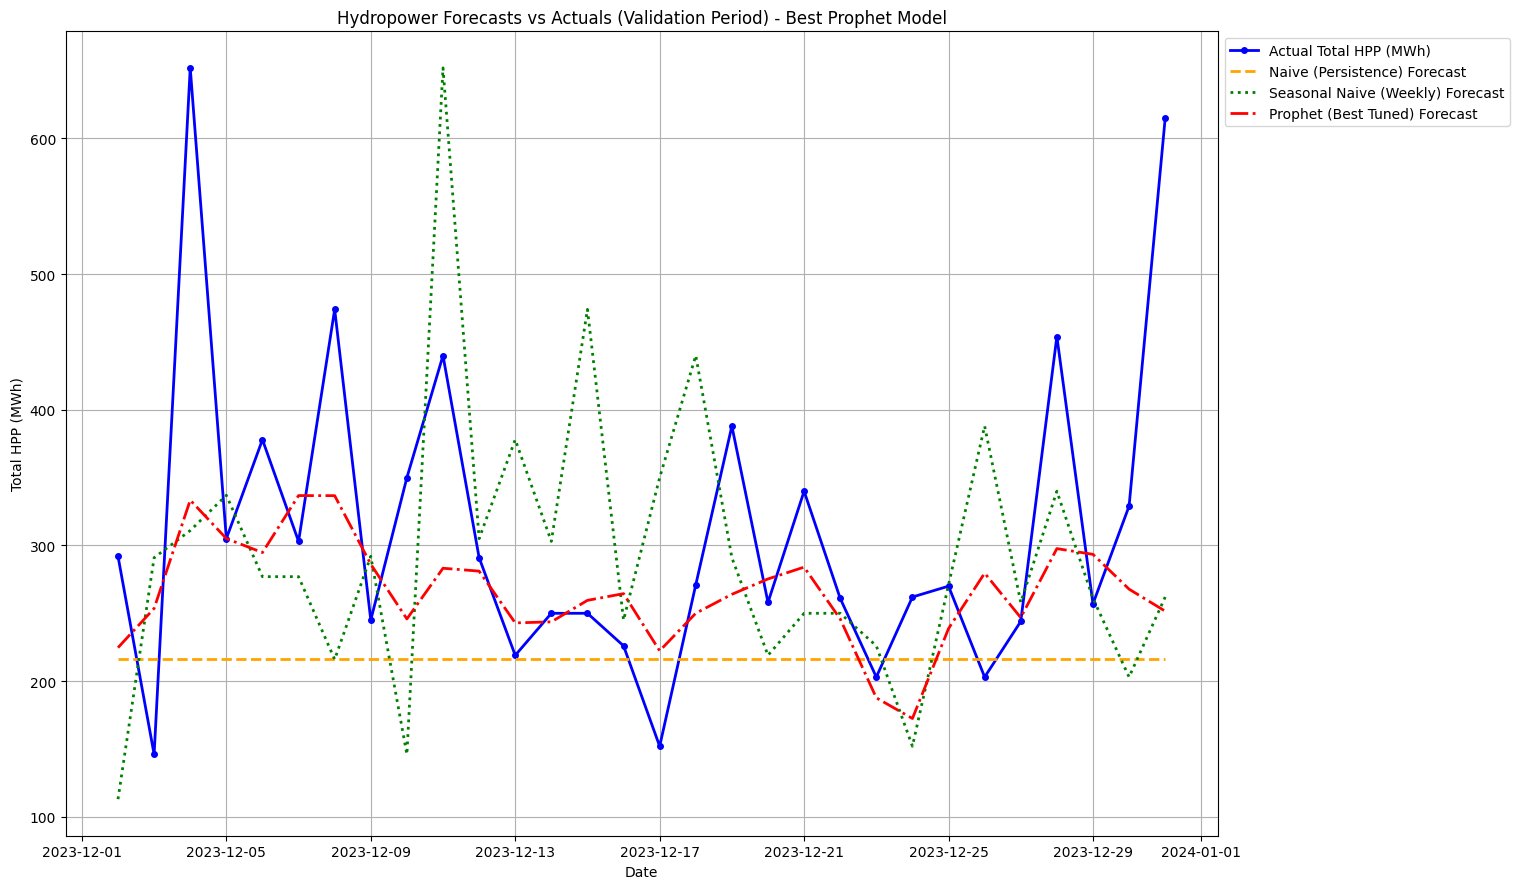

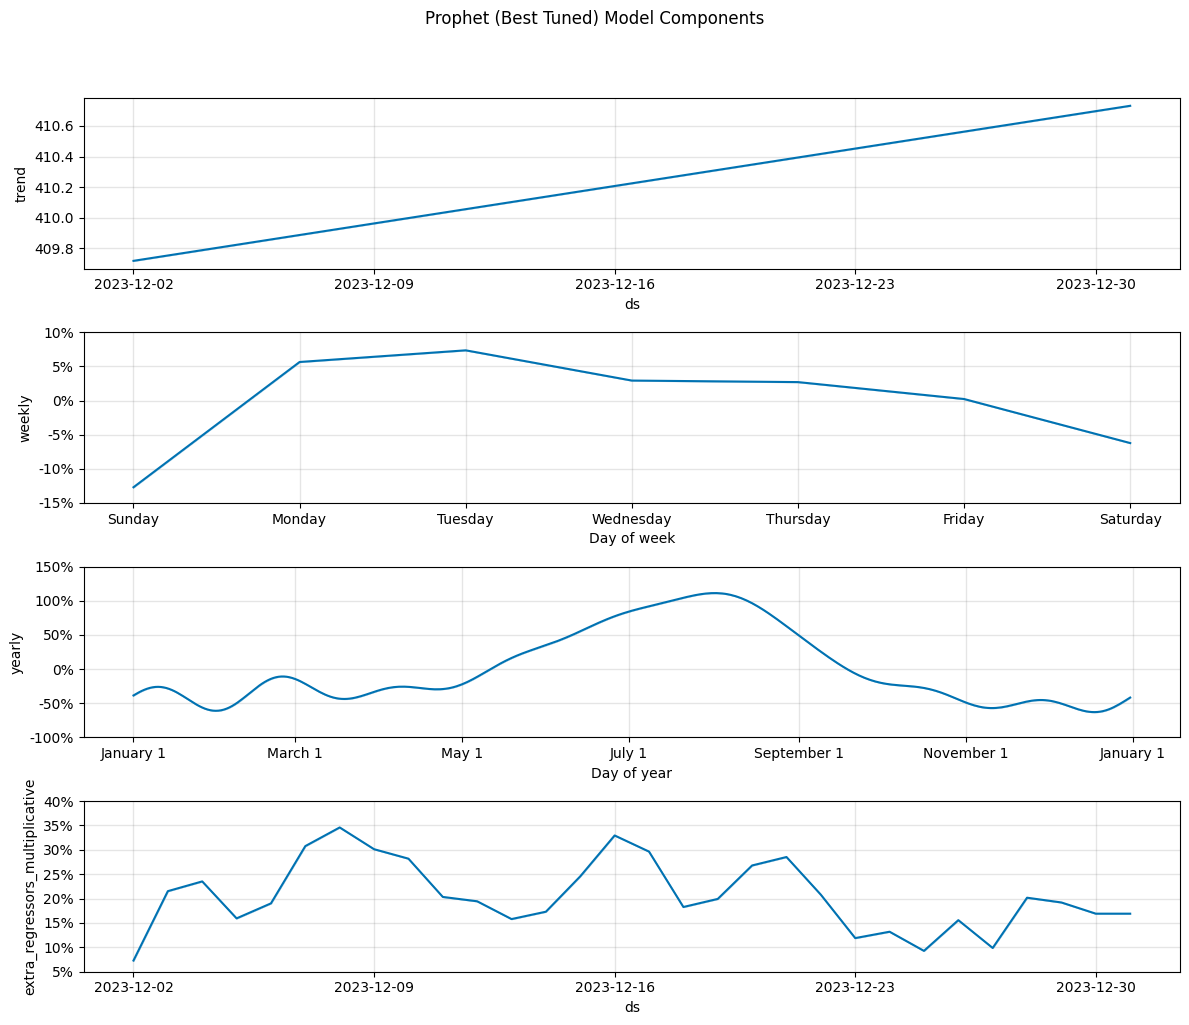

In [20]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot # For Q-Q plot

# --- Configuration (from your existing script) ---
target_column = "Total HPP"
validation_days = 30

# --- Utility Functions (from your existing script) ---
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

def calculate_smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_pred - y_true) / np.maximum(denominator, 1e-8)) * 100

def print_metrics(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = calculate_mape(y_true, y_pred)
    smape = calculate_smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {model_name} Performance Statistics (Validation Set) ---")
    print(f"MAE: {mae:.4f} MWh")
    print(f"RMSE: {rmse:.4f} MWh")
    print(f"MAPE: {mape:.2f}%")
    print(f"SMAPE: {smape:.2f}%")
    print(f"R2 Score: {r2:.4f}")
    return {"MAE": mae, "RMSE": rmse, "MAPE": mape, "SMAPE": smape, "R2": r2}


# --- Ensure merged_df is ready (from your existing script's initial preparation) ---
print("Preparing merged_df for Prophet finetuning...")
merged_df[target_column] = merged_df[target_column].astype(float)
merged_df["Date"] = pd.to_datetime(merged_df["Date"])
merged_df = merged_df.sort_values(by="Date").reset_index(drop=True)
if "time_idx" not in merged_df.columns:
    merged_df["time_idx"] = np.arange(len(merged_df))


# --- Data Splitting (from your existing script) ---
training_cutoff_idx = merged_df["time_idx"].max() - validation_days
training_cutoff_date = merged_df.loc[merged_df["time_idx"] == training_cutoff_idx, "Date"].iloc[0]

train_df = merged_df[merged_df["Date"] <= training_cutoff_date].copy()
val_df = merged_df[merged_df["Date"] > training_cutoff_date].copy()

validation_start_date = val_df["Date"].min()
validation_end_date = val_df["Date"].max()

# Prepare Prophet-specific DataFrames for training and validation
prophet_df_full = merged_df[["Date", target_column,
                             "temperature_2m_mean", "precipitation_sum", "rain_sum"]].copy()
prophet_df_full = prophet_df_full.rename(columns={"Date": "ds", target_column: "y"})

train_prophet_df = prophet_df_full[prophet_df_full["ds"] <= training_cutoff_date]
val_prophet_df = prophet_df_full[prophet_df_full["ds"] > training_cutoff_date]

prophet_y_true = val_prophet_df['y'].values # Actuals for validation
future_df = val_prophet_df[['ds', 'temperature_2m_mean', 'precipitation_sum', 'rain_sum']].copy() # For Prophet prediction


# --- Prophet Finetuning Parameters ---
changepoint_scales = [0.01, 0.05, 0.1] # Values around the default (0.05)
seasonality_scales = [5, 10, 20] # Values around the default (10)

best_r2 = -float('inf')
best_params = {}
all_results = []

print("\n--- Starting Prophet Finetuning Grid Search ---")

for cp_scale in changepoint_scales:
    for s_scale in seasonality_scales:
        print(f"\n--- Testing: changepoint_prior_scale={cp_scale}, seasonality_prior_scale={s_scale} ---")

        m_tuned = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative', # Keeping multiplicative for now
            growth='linear', # Keeping linear for now
            changepoint_prior_scale=cp_scale,
            seasonality_prior_scale=s_scale
        )

        regressors = ["temperature_2m_mean", "precipitation_sum", "rain_sum"]
        for regressor in regressors:
            m_tuned.add_regressor(regressor)

        m_tuned.fit(train_prophet_df)
        forecast_tuned = m_tuned.predict(future_df)
        y_pred_tuned = forecast_tuned['yhat'].values

        metrics = print_metrics(f"Prophet (CP:{cp_scale}, S:{s_scale})", prophet_y_true, y_pred_tuned)
        all_results.append({
            'changepoint_prior_scale': cp_scale,
            'seasonality_prior_scale': s_scale,
            'R2': metrics['R2'],
            'MAE': metrics['MAE'],
            'RMSE': metrics['RMSE'],
            'MAPE': metrics['MAPE'],
            'SMAPE': metrics['SMAPE']
        })

        if metrics['R2'] > best_r2:
            best_r2 = metrics['R2']
            best_params = {'changepoint_prior_scale': cp_scale, 'seasonality_prior_scale': s_scale}

print("\n--- Prophet Finetuning Complete ---")
print(f"Best R2 found: {best_r2:.4f}")
print(f"Best parameters: {best_params}")

# Display all results in a DataFrame for easy comparison
results_df = pd.DataFrame(all_results)
print("\nAll Finetuning Results (sorted by R2):")
print(results_df.sort_values(by='R2', ascending=False))

# --- OPTIONAL: Train and plot the best model found ---
if best_params:
    print(f"\n--- Retraining and Plotting Best Prophet Model (CP:{best_params['changepoint_prior_scale']}, S:{best_params['seasonality_prior_scale']}) ---")
    m_best = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        seasonality_mode='multiplicative',
        growth='linear',
        changepoint_prior_scale=best_params['changepoint_prior_scale'],
        seasonality_prior_scale=best_params['seasonality_prior_scale']
    )
    for regressor in regressors:
        m_best.add_regressor(regressor)
    m_best.fit(train_prophet_df)
    forecast_best = m_best.predict(future_df)
    prophet_y_pred_best = forecast_best['yhat'].values

    # Combined Plot for Best Prophet vs Baselines
    val_dates_for_plot = val_prophet_df['ds'].values # Dates for x-axis

    # --- Re-calculate baselines for comparison if needed in this block ---
    last_training_value = train_df[target_column].iloc[-1]
    naive_predictions = np.full_like(prophet_y_true, last_training_value)

    start_date_prev_week = validation_start_date - pd.Timedelta(days=7)
    end_date_prev_week = validation_end_date - pd.Timedelta(days=7)
    previous_week_actuals_df = merged_df[(merged_df["Date"] >= start_date_prev_week) &
                                        (merged_df["Date"] <= end_date_prev_week)
                                        ].copy()
    if len(previous_week_actuals_df) >= len(prophet_y_true):
        seasonal_naive_predictions = previous_week_actuals_df[target_column].values[:len(prophet_y_true)]
    else:
        padding_needed = len(prophet_y_true) - len(previous_week_actuals_df)
        seasonal_naive_predictions = np.concatenate([
            previous_week_actuals_df[target_column].values,
            np.full(padding_needed, last_training_value)
        ])

    plt.figure(figsize=(18, 9))
    plt.plot(val_dates_for_plot, prophet_y_true, label='Actual Total HPP (MWh)', color='blue', linewidth=2, marker='o', markersize=4)
    plt.plot(val_dates_for_plot, naive_predictions, label='Naive (Persistence) Forecast', color='orange', linestyle='--', linewidth=2)
    plt.plot(val_dates_for_plot, seasonal_naive_predictions, label='Seasonal Naive (Weekly) Forecast', color='green', linestyle=':', linewidth=2)
    plt.plot(val_dates_for_plot, prophet_y_pred_best, label='Prophet (Best Tuned) Forecast', color='red', linestyle='-.', linewidth=2)

    plt.title('Hydropower Forecasts vs Actuals (Validation Period) - Best Prophet Model')
    plt.xlabel('Date')
    plt.ylabel('Total HPP (MWh)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

    # Prophet's built-in components plot for the best model
    fig_best_components = m_best.plot_components(forecast_best)
    fig_best_components.set_size_inches(12, 10)
    fig_best_components.suptitle('Prophet (Best Tuned) Model Components', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

Preparing merged_df for best Prophet model analysis...

--- Training the Best Prophet Model with parameters: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5} ---


12:09:58 - cmdstanpy - INFO - Chain [1] start processing
12:09:59 - cmdstanpy - INFO - Chain [1] done processing


Best Prophet model fitted.

--- Best Tuned Prophet Performance Statistics (Validation Set) ---
MAE: 75.8278 MWh
RMSE: 113.2906 MWh
MAPE: 22.04%
SMAPE: 23.70%
R2 Score: 0.0564

--- Generating Plots for the Best Tuned Prophet Model ---


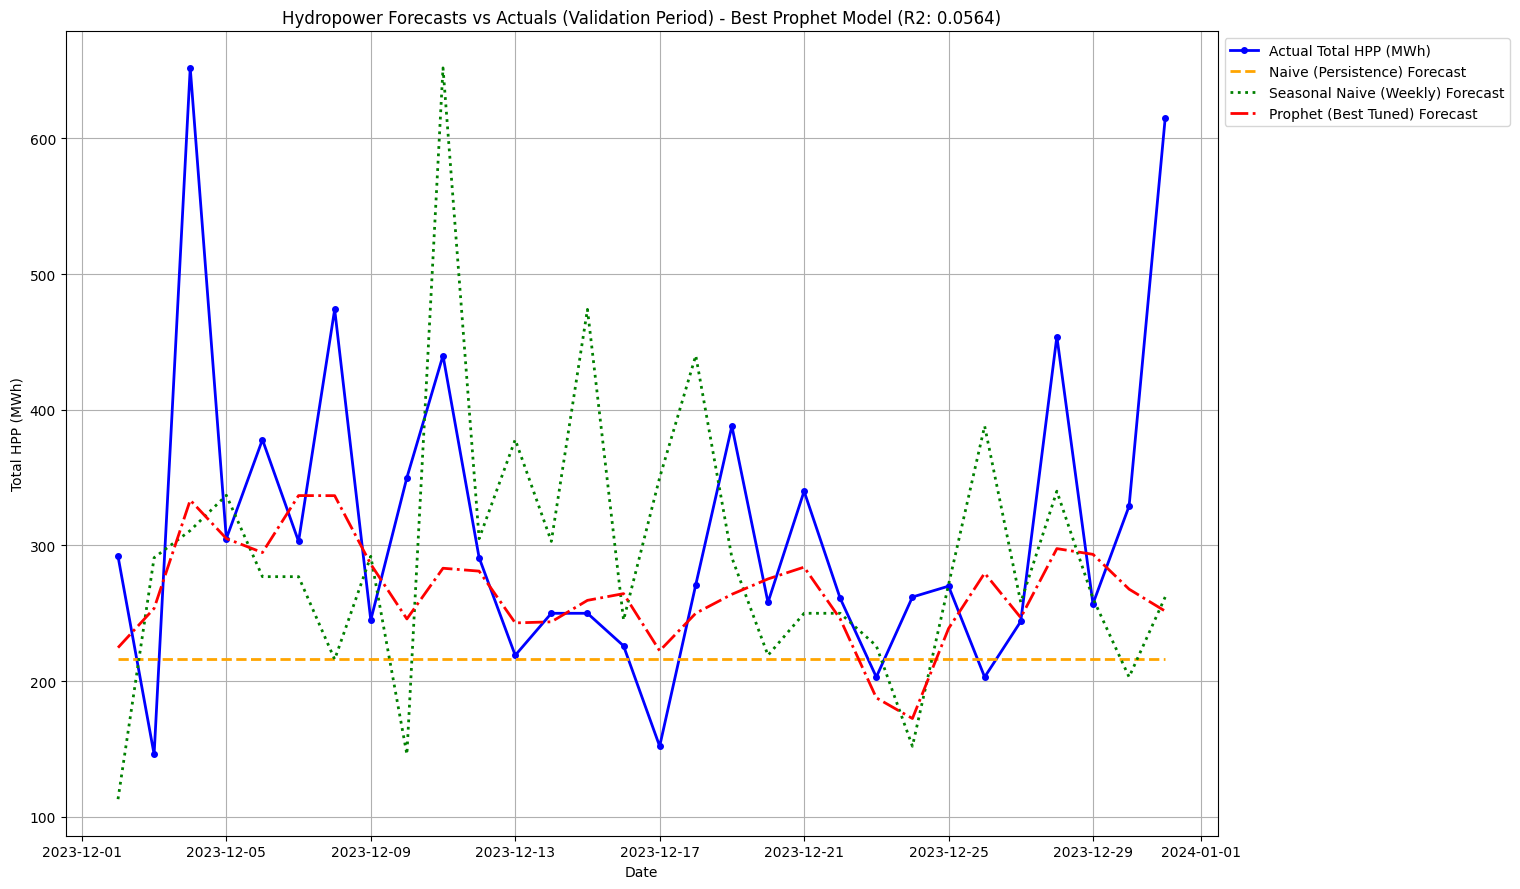

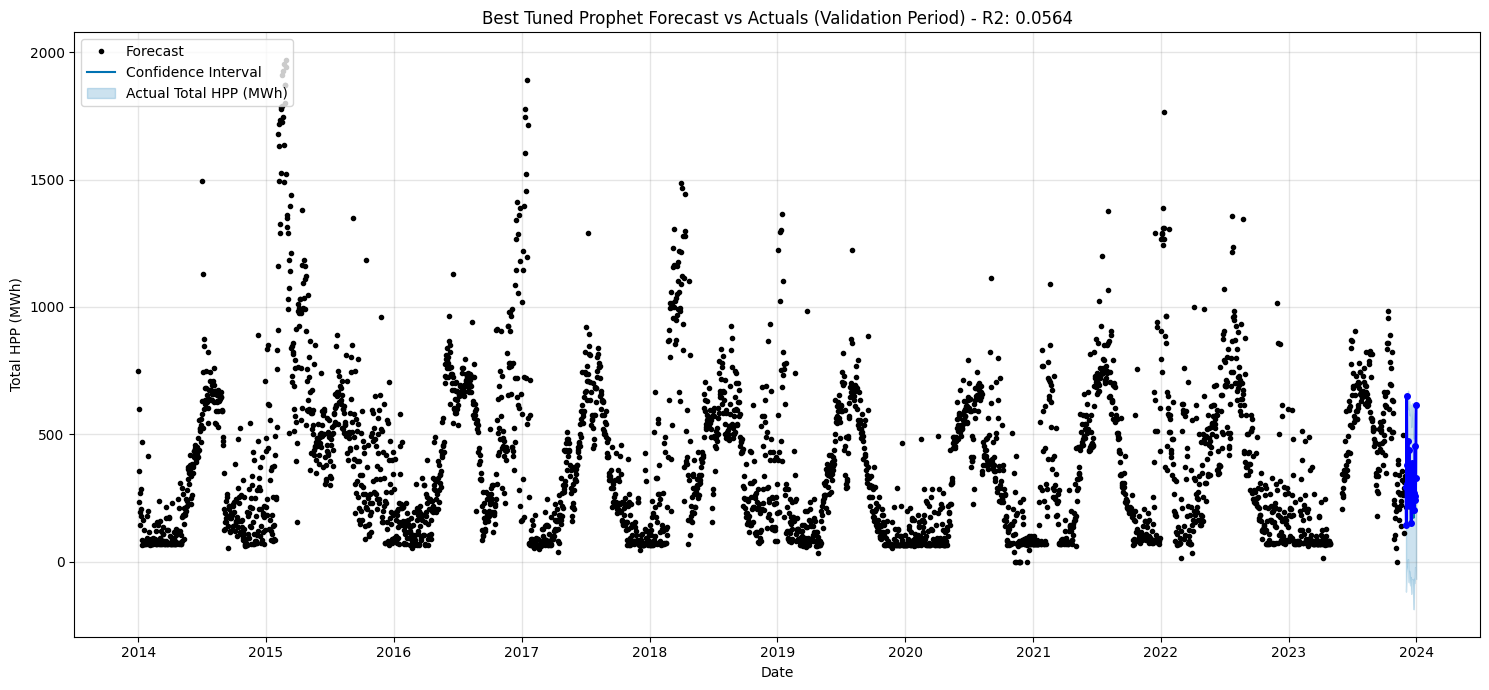


--- Generating Prophet Components Plot for the Best Tuned Model ---


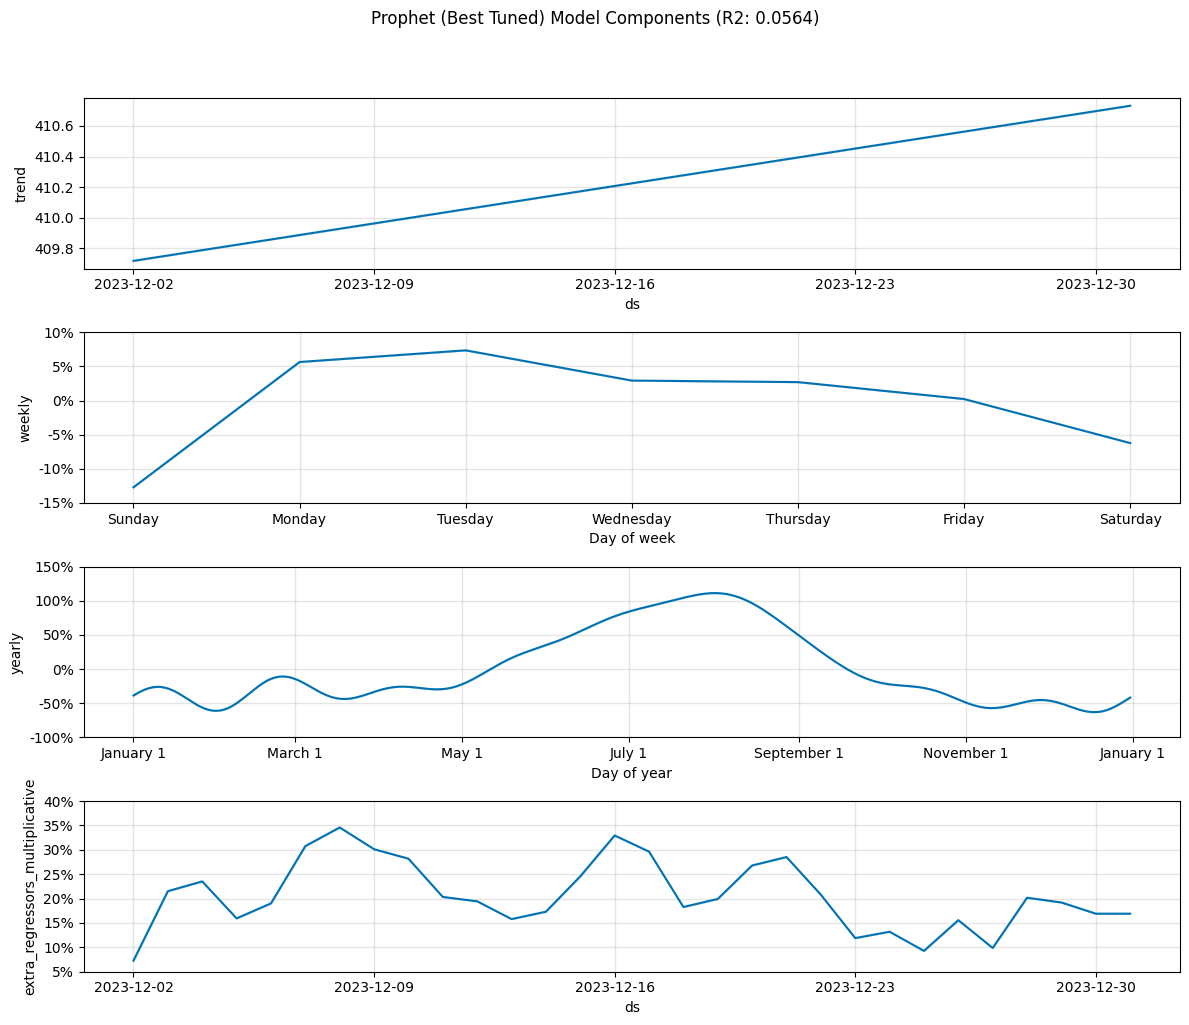


--- Generating Actual vs. Predicted Scatter Plot for Best Tuned Prophet ---


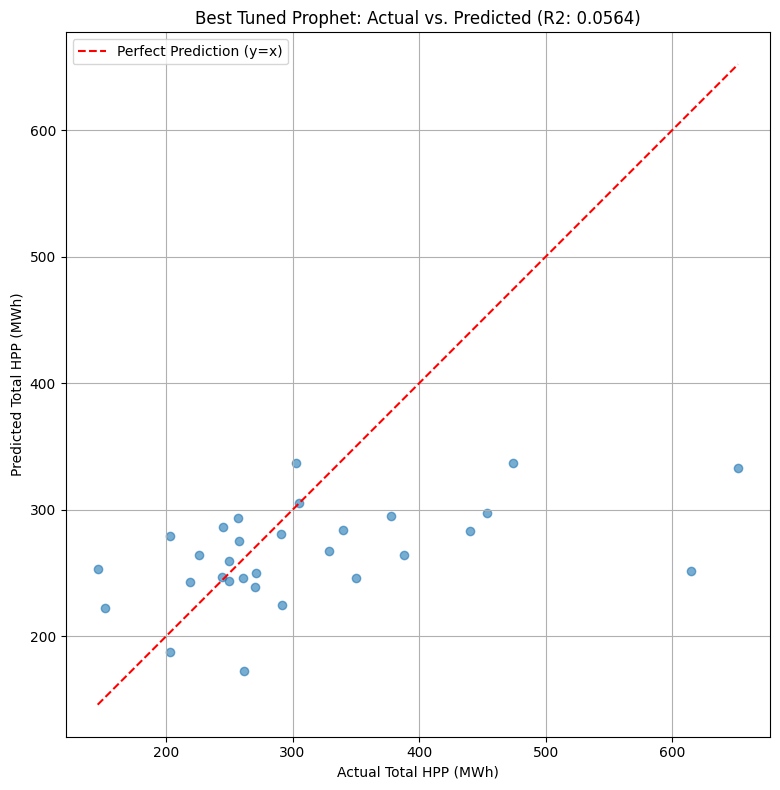


--- Generating Forecast Error Distribution Plots for Best Tuned Prophet ---


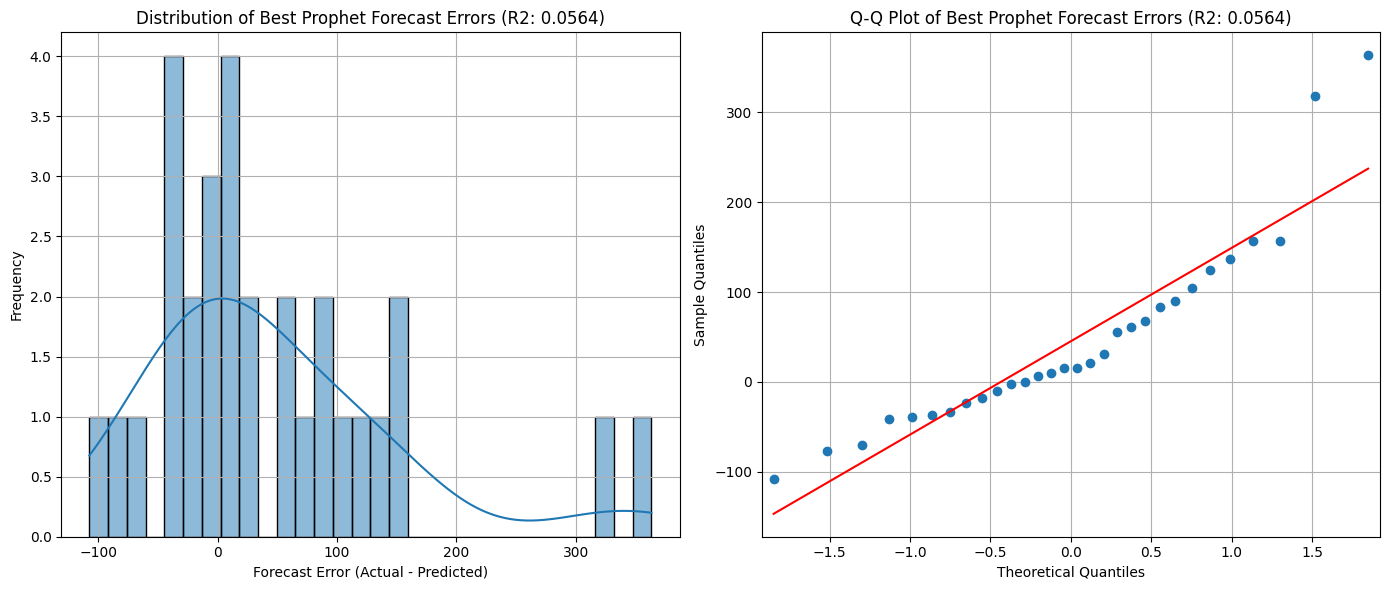


--- All plots for the Best Tuned Prophet model generated. ---


In [21]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot # For Q-Q plot

# --- Configuration (from your existing script) ---
target_column = "Total HPP"
validation_days = 30

# --- Utility Functions (from your existing script) ---
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

def calculate_smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_pred - y_true) / np.maximum(denominator, 1e-8)) * 100

def print_metrics(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = calculate_mape(y_true, y_pred)
    smape = calculate_smape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {model_name} Performance Statistics (Validation Set) ---")
    print(f"MAE: {mae:.4f} MWh")
    print(f"RMSE: {rmse:.4f} MWh")
    print(f"MAPE: {mape:.2f}%")
    print(f"SMAPE: {smape:.2f}%")
    print(f"R2 Score: {r2:.4f}")
    return {"MAE": mae, "RMSE": rmse, "MAPE": mape, "SMAPE": smape, "R2": r2}


# --- Ensure merged_df is ready (from your existing script's initial preparation) ---
print("Preparing merged_df for best Prophet model analysis...")
merged_df[target_column] = merged_df[target_column].astype(float)
merged_df["Date"] = pd.to_datetime(merged_df["Date"])
merged_df = merged_df.sort_values(by="Date").reset_index(drop=True)
if "time_idx" not in merged_df.columns:
    merged_df["time_idx"] = np.arange(len(merged_df))


# --- Data Splitting (from your existing script) ---
training_cutoff_idx = merged_df["time_idx"].max() - validation_days
training_cutoff_date = merged_df.loc[merged_df["time_idx"] == training_cutoff_idx, "Date"].iloc[0]

train_df = merged_df[merged_df["Date"] <= training_cutoff_date].copy()
val_df = merged_df[merged_df["Date"] > training_cutoff_date].copy()

validation_start_date = val_df["Date"].min()
validation_end_date = val_df["Date"].max()

# Prepare Prophet-specific DataFrames for training and validation
prophet_df_full = merged_df[["Date", target_column,
                             "temperature_2m_mean", "precipitation_sum", "rain_sum"]].copy()
prophet_df_full = prophet_df_full.rename(columns={"Date": "ds", target_column: "y"})

train_prophet_df = prophet_df_full[prophet_df_full["ds"] <= training_cutoff_date]
val_prophet_df = prophet_df_full[prophet_df_full["ds"] > training_cutoff_date]

prophet_y_true = val_prophet_df['y'].values # Actuals for validation
future_df = val_prophet_df[['ds', 'temperature_2m_mean', 'precipitation_sum', 'rain_sum']].copy() # For Prophet prediction


# --- Define Best Parameters Found ---
best_params = {
    'changepoint_prior_scale': 0.05,
    'seasonality_prior_scale': 5
}
best_r2_val = 0.056354 # Storing the best R2 value you provided


# --- Train the Best Prophet Model ---
print(f"\n--- Training the Best Prophet Model with parameters: {best_params} ---")

m_best = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    growth='linear',
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale']
)

regressors = ["temperature_2m_mean", "precipitation_sum", "rain_sum"]
for regressor in regressors:
    m_best.add_regressor(regressor)

m_best.fit(train_prophet_df)
print("Best Prophet model fitted.")

# Generate forecast using the best model for the validation period
forecast_best = m_best.predict(future_df)
prophet_y_pred_best = forecast_best['yhat'].values

# Print metrics for the best model to confirm
best_model_metrics = print_metrics("Best Tuned Prophet", prophet_y_true, prophet_y_pred_best)


# --- 5. Generate Plots for the Best Tuned Prophet Model ---
print("\n--- Generating Plots for the Best Tuned Prophet Model ---")

# Get the dates for the validation period (x-axis for plots)
val_dates_for_plot = val_prophet_df['ds'].values

# 5.1. Combined Plot: Actuals vs. Best Prophet vs. Baselines
# Recalculate baselines just to ensure they are available for this specific plot block
last_training_value = train_df[target_column].iloc[-1]
naive_predictions = np.full_like(prophet_y_true, last_training_value)

start_date_prev_week = validation_start_date - pd.Timedelta(days=7)
end_date_prev_week = validation_end_date - pd.Timedelta(days=7)
previous_week_actuals_df = merged_df[(merged_df["Date"] >= start_date_prev_week) &
                                    (merged_df["Date"] <= end_date_prev_week)
                                    ].copy()
if len(previous_week_actuals_df) >= len(prophet_y_true):
    seasonal_naive_predictions = previous_week_actuals_df[target_column].values[:len(prophet_y_true)]
else:
    padding_needed = len(prophet_y_true) - len(previous_week_actuals_df)
    seasonal_naive_predictions = np.concatenate([
        previous_week_actuals_df[target_column].values,
        np.full(padding_needed, last_training_value)
    ])

plt.figure(figsize=(18, 9))
plt.plot(val_dates_for_plot, prophet_y_true, label='Actual Total HPP (MWh)', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(val_dates_for_plot, naive_predictions, label='Naive (Persistence) Forecast', color='orange', linestyle='--', linewidth=2)
plt.plot(val_dates_for_plot, seasonal_naive_predictions, label='Seasonal Naive (Weekly) Forecast', color='green', linestyle=':', linewidth=2)
plt.plot(val_dates_for_plot, prophet_y_pred_best, label='Prophet (Best Tuned) Forecast', color='red', linestyle='-.', linewidth=2)

plt.title(f'Hydropower Forecasts vs Actuals (Validation Period) - Best Prophet Model (R2: {best_r2_val:.4f})')
plt.xlabel('Date')
plt.ylabel('Total HPP (MWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


# 5.2. Prophet's Standard Forecast Plot (Actuals, Prediction, and Confidence Intervals for best model)
plt.figure(figsize=(15, 7))
fig_ax = m_best.plot(forecast_best, ax=plt.gca()) # This plots yhat and its confidence intervals
plt.plot(val_prophet_df['ds'], prophet_y_true,
         label='Actual Total HPP (MWh)', color='blue', linewidth=2, marker='o', markersize=4) # Overlay actuals

plt.title(f'Best Tuned Prophet Forecast vs Actuals (Validation Period) - R2: {best_r2_val:.4f}')
plt.xlabel('Date')
plt.ylabel('Total HPP (MWh)')
plt.legend(['Forecast', 'Confidence Interval', 'Actual Total HPP (MWh)'], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5.3. Prophet's Components Plot for the Best Model
print("\n--- Generating Prophet Components Plot for the Best Tuned Model ---")
fig_best_components = m_best.plot_components(forecast_best)
fig_best_components.set_size_inches(12, 10)
fig_best_components.suptitle(f'Prophet (Best Tuned) Model Components (R2: {best_r2_val:.4f})', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# 5.4. Actual vs. Predicted (Scatter Plot for Best Prophet)
print("\n--- Generating Actual vs. Predicted Scatter Plot for Best Tuned Prophet ---")
plt.figure(figsize=(8, 8))
plt.scatter(prophet_y_true, prophet_y_pred_best, alpha=0.6)
plt.plot([min(prophet_y_true), max(prophet_y_true)], [min(prophet_y_true), max(prophet_y_true)],
         color='red', linestyle='--', label='Perfect Prediction (y=x)')

plt.title(f'Best Tuned Prophet: Actual vs. Predicted (R2: {best_r2_val:.4f})')
plt.xlabel('Actual Total HPP (MWh)')
plt.ylabel('Predicted Total HPP (MWh)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


# 5.5. Forecast Error Distribution (Histogram and Q-Q Plot for Best Prophet)
print("\n--- Generating Forecast Error Distribution Plots for Best Tuned Prophet ---")
forecast_errors_best = prophet_y_true - prophet_y_pred_best

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(forecast_errors_best, kde=True, bins=30)
plt.title(f'Distribution of Best Prophet Forecast Errors (R2: {best_r2_val:.4f})')
plt.xlabel('Forecast Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
qqplot(forecast_errors_best, line='s', ax=plt.gca())
plt.title(f'Q-Q Plot of Best Prophet Forecast Errors (R2: {best_r2_val:.4f})')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- All plots for the Best Tuned Prophet model generated. ---")

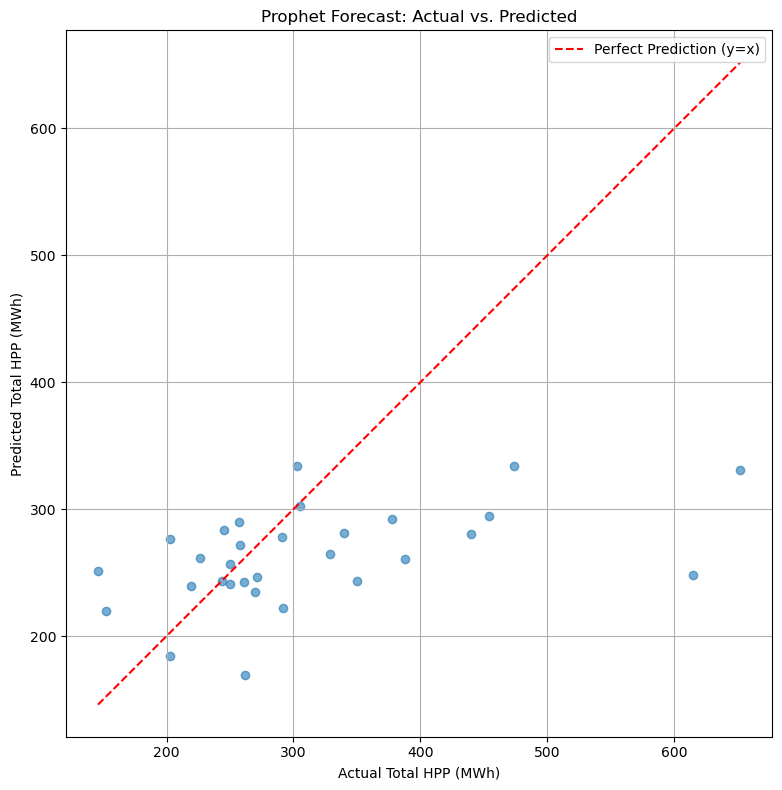

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(prophet_y_true, prophet_y_pred, alpha=0.6)
plt.plot([min(prophet_y_true), max(prophet_y_true)], [min(prophet_y_true), max(prophet_y_true)],
         color='red', linestyle='--', label='Perfect Prediction (y=x)') # 45-degree line

plt.title('Prophet Forecast: Actual vs. Predicted')
plt.xlabel('Actual Total HPP (MWh)')
plt.ylabel('Predicted Total HPP (MWh)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box') # Make axes scale equally
plt.tight_layout()
plt.show()

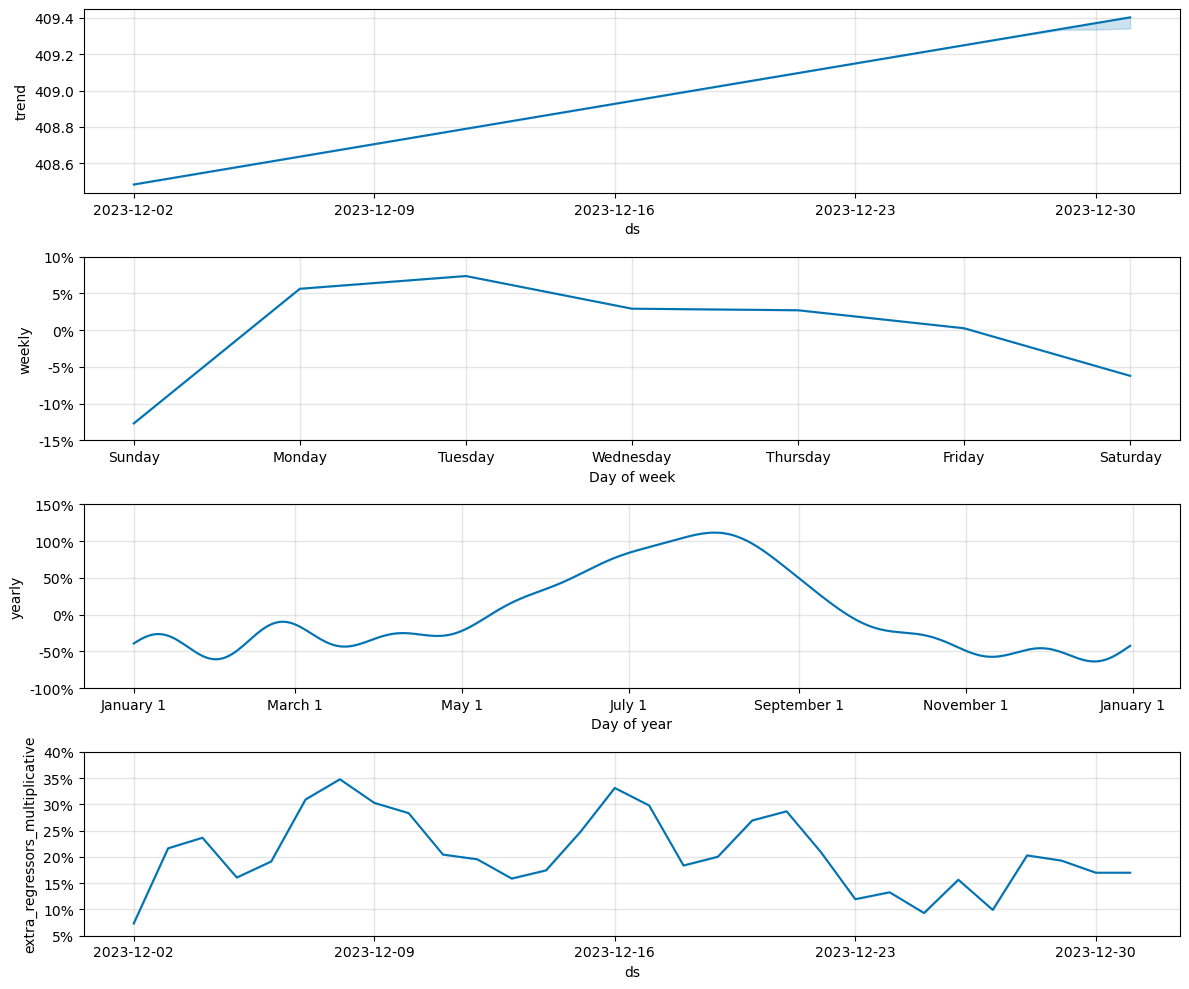

In [ ]:
fig_components = m.plot_components(forecast)
fig_components.set_size_inches(12, 10)
plt.tight_layout()
plt.show()